In [1]:
source("base/it-402-dc-data_initial_exploration-base.r")

── Attaching packages ────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ───────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



<p><br /></p>

## Notes

* historical data at https://www.gov.scot/publications/school-statistics-historical-pupil-school-and-teacher-numbers
    * Note the numbers in the roll (1996-2018) differ from the historical series
    * the historical series has detail by year from 1995 but sums only for the full time period
    * Both sets analysed here - mainly to confirm the patterns generally match; however, using the latter as it spans the full time needed and also provides additional historical context

    * special schools and centrally employed not counted - not possible to split secondary level from primary
<p><br /></p>

* teacher censuses - https://www.gov.scot/publications/summary-statistics-schools-scotland-2020

### School Rolls - 1996 - 2019

In [2]:
school_rolls_1996_2018 <- read_csv("sta_it_402/data//demographic_data/school_rolls_1996-2018.csv", trim_ws = T) %>% #, skip_empty_rows = T) # NOT skipping empty rows... :(
                    filter(rowSums(is.na(.)) != ncol(.))

glimpse(school_rolls_1996_2018)
head(school_rolls_1996_2018)



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_number(),
  `LA Code` = col_double(),
  `LA Name` = col_character(),
  Code = col_double(),
  Name = col_character(),
  Sector = col_character(),
  `School Type` = col_character(),
  `2012` = col_character(),
  `2013` = col_double(),
  `2014` = col_double(),
  `2015` = col_double(),
  `2016` = col_double(),
  `2017` = col_double(),
  `2018` = col_double()
)
ℹ Use `spec()` for the full column specifications.


Warning message:
“1 parsing failure.
 row  col               expected actual                                                           file
1359 2016 no trailing characters  1,604 'sta_it_402/data//demographic_data/school_rolls_1996-2018.csv'
”


Rows: 3,358
Columns: 29
$ `LA Code`     <dbl> 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, …
$ `LA Name`     <chr> "Aberdeen City", "Aberdeen City", "Aberdeen City", "Abe…
$ Code          <dbl> 5237521, 5237629, 5237726, 5237823, 5234026, 5238021, 5…
$ Name          <chr> "Abbotswell", "Airyhall", "Ashgrove Children's Centre",…
$ Sector        <chr> "Primary", "Primary", "Primary", "Primary", "Primary", …
$ `School Type` <chr> "Local Authority", "Local Authority", "Local Authority"…
$ `1996`        <dbl> 283, 264, 24, 437, 111, 98, 132, 0, 499, 162, 136, 158,…
$ `1997`        <dbl> 268, 273, 23, 441, 105, 99, 120, 0, 500, 168, 118, 156,…
$ `1998`        <dbl> 283, 275, 26, 431, 125, 104, 102, 0, 499, 196, 122, 157…
$ `1999`        <dbl> 254, 281, 23, 445, 132, 101, 110, 0, 481, 188, 113, 162…
$ `2000`        <dbl> 258, 254, 0, 433, 126, 97, 86, 0, 474, 180, 111, 130, 2…
$ `2001`        <dbl> 246, 256, 0, 422, 127, 79, 99, 0, 464, 173, 101, 121, 2…
$ `2002`        <dbl> 253, 2

LA Code LA Name       Code    Name                           Sector 
1 100     Aberdeen City 5237521 Abbotswell                     Primary
2 100     Aberdeen City 5237629 Airyhall                       Primary
3 100     Aberdeen City 5237726 Ashgrove Children's Centre     Primary
4 100     Aberdeen City 5237823 Ashley Road                    Primary
5 100     Aberdeen City 5234026 Balgownie                      Primary
6 100     Aberdeen City 5238021 Braeside Nursery/Infant School Primary
  School Type     1996 1997 1998 1999 ⋯ 2009 2010 2011 2012 2013 2014 2015 2016
1 Local Authority 283  268  283  254  ⋯ 212  203  190  194  188  193  191  201 
2 Local Authority 264  273  275  281  ⋯ 308  311  307  322  321  316  339  355 
3 Local Authority  24   23   26   23  ⋯   0    0    0  0      0    0    0    0 
4 Local Authority 437  441  431  445  ⋯ 392  386  375  378  381  389  375  366 
5 Local Authority 111  105  125  132  ⋯ 190  161  167  170  173  184  193  189 
6 Local Authority  98   99  104  101  ⋯   0    0    0  0      0    0    0    0 
  2017 2018
1 214  230 
2 363  353 
3   0    0 
4 372  397 
5 210  243 
6   0    0

In [3]:
school_rolls_1996_2018 <- school_rolls_1996_2018 %>%

    #rename_with(., str_to_title) %>%
    rename_with(., ~ (gsub("\\s+", "", .x))) %>%
    #rename_with(., ~ (gsub("LA", "LocalAuthority", .x))) %>%
    rename(LocalAuthorityCode = LACode) %>%
    rename(LocalAuthority = LAName) %>%
    filter(Sector == "Secondary") %>%
    mutate_at(c("LocalAuthorityCode", "LocalAuthority", "Code", "Sector", "SchoolType"), as.factor)

names(school_rolls_1996_2018)

[1] "LocalAuthorityCode" "LocalAuthority"     "Code"              
 [4] "Name"               "Sector"             "SchoolType"        
 [7] "1996"               "1997"               "1998"              
[10] "1999"               "2000"               "2001"              
[13] "2002"               "2003"               "2004"              
[16] "2005"               "2006"               "2007"              
[19] "2008"               "2009"               "2010"              
[22] "2011"               "2012"               "2013"              
[25] "2014"               "2015"               "2016"              
[28] "2017"               "2018"

In [4]:
school_rolls_1996_2018 <- school_rolls_1996_2018 %>%

    mutate_at(vars(matches(regex("\\b\\d{4}\\b"))), as.character) %>%
    mutate_at(vars(matches(regex("\\b\\d{4}\\b"))), parse_number) %>%
    mutate_at(vars(matches(regex("\\b\\d{4}\\b"))), as.integer) %>%

    pivot_longer(matches(regex("\\b\\d{4}\\b")), names_to = "year", values_to = "roll") %>% 
    mutate_at(c("year"), as.ordered)

glimpse(school_rolls_1996_2018)

Warning message:
“Problem with `mutate()` input `2012`.
ℹ 12 parsing failures.
row col expected actual
 40  -- a number      .
 81  -- a number      .
145  -- a number      .
146  -- a number      .
148  -- a number      .
... ... ........ ......
See problems(...) for more details.

ℹ Input `2012` is `(function (x, na = c("", "NA"), locale = default_locale(), trim_ws = TRUE) ...`.”
Warning message:
“12 parsing failures.
row col expected actual
 40  -- a number      .
 81  -- a number      .
145  -- a number      .
146  -- a number      .
148  -- a number      .
... ... ........ ......
See problems(...) for more details.
”


Rows: 11,592
Columns: 8
$ LocalAuthorityCode <fct> 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, …
$ LocalAuthority     <fct> Aberdeen City, Aberdeen City, Aberdeen City, Aberd…
$ Code               <fct> 5244439, 5244439, 5244439, 5244439, 5244439, 52444…
$ Name               <chr> "Aberdeen Grammar", "Aberdeen Grammar", "Aberdeen …
$ Sector             <fct> Secondary, Secondary, Secondary, Secondary, Second…
$ SchoolType         <fct> Local Authority, Local Authority, Local Authority,…
$ year               <ord> 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 20…
$ roll               <int> 1069, 1059, 1102, 1101, 1113, 1110, 1132, 1136, 11…


In [5]:
levels(school_rolls_1996_2018$year)
base_year <- levels(school_rolls_1996_2018$year)[1]
base_year

[1] "1996" "1997" "1998" "1999" "2000" "2001" "2002" "2003" "2004" "2005"
[11] "2006" "2007" "2008" "2009" "2010" "2011" "2012" "2013" "2014" "2015"
[21] "2016" "2017" "2018"

[1] "1996"

In [6]:
str(school_rolls_1996_2018)

unique(school_rolls_1996_2018$LocalAuthority)
length(unique(school_rolls_1996_2018$LocalAuthority))

tibble [11,592 × 8] (S3: tbl_df/tbl/data.frame)
 $ LocalAuthorityCode: Factor w/ 33 levels "100","110","120",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ LocalAuthority    : Factor w/ 33 levels "Aberdeen City",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Code              : Factor w/ 504 levels "1002732","1003062",..: 70 70 70 70 70 70 70 70 70 70 ...
 $ Name              : chr [1:11592] "Aberdeen Grammar" "Aberdeen Grammar" "Aberdeen Grammar" "Aberdeen Grammar" ...
 $ Sector            : Factor w/ 1 level "Secondary": 1 1 1 1 1 1 1 1 1 1 ...
 $ SchoolType        : Factor w/ 3 levels "grant aided",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year              : Ord.factor w/ 23 levels "1996"<"1997"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ roll              : int [1:11592] 1069 1059 1102 1101 1113 1110 1132 1136 1156 1168 ...


[1] Aberdeen City       Aberdeenshire       Angus              
 [4] Argyll & Bute       Clackmannanshire    Dumfries & Galloway
 [7] Dundee City         East Ayrshire       East Dunbartonshire
[10] East Lothian        East Renfrewshire   Edinburgh, City of 
[13] Eilean Siar         Falkirk             Fife               
[16] Glasgow City        Highland            Inverclyde         
[19] Midlothian          Moray               North Ayrshire     
[22] North Lanarkshire   Orkney Islands      Perth & Kinross    
[25] Renfrewshire        Scottish Borders    Shetland Islands   
[28] South Ayrshire      South Lanarkshire   Stirling           
[31] West Dunbartonshire West Lothian        Grant Maintained   
33 Levels: Aberdeen City Aberdeenshire Angus Argyll & Bute ... West Lothian

[1] 33

In [7]:
index_factors_by_local_authority <- school_rolls_1996_2018 %>%

    group_by(LocalAuthorityCode, LocalAuthority, year) %>%
    summarise(roll = sum(roll, na.rm = TRUE)) %>%

    left_join(school_rolls_1996_2018 %>%
              
                  filter(year == base_year) %>%
                  group_by(LocalAuthorityCode, LocalAuthority) %>%
                  summarise(base_year_roll = sum(roll, na.rm = TRUE))
              ) %>%

    mutate(index_factor = roll / base_year_roll)
    
index_factors_by_local_authority[c(1:6, 34:39), ]


`summarise()` regrouping output by 'LocalAuthorityCode', 'LocalAuthority' (override with `.groups` argument)

`summarise()` regrouping output by 'LocalAuthorityCode' (override with `.groups` argument)

Joining, by = c("LocalAuthorityCode", "LocalAuthority")



LocalAuthorityCode LocalAuthority year roll  base_year_roll index_factor
1  100                Aberdeen City  1996 12564 12564          1.0000000   
2  100                Aberdeen City  1997 12736 12564          1.0136899   
3  100                Aberdeen City  1998 12698 12564          1.0106654   
4  100                Aberdeen City  1999 12632 12564          1.0054123   
5  100                Aberdeen City  2000 12564 12564          1.0000000   
6  100                Aberdeen City  2001 12589 12564          1.0019898   
7  110                Aberdeenshire  2006 15766 15255          1.0334972   
8  110                Aberdeenshire  2007 15517 15255          1.0171747   
9  110                Aberdeenshire  2008 15087 15255          0.9889872   
10 110                Aberdeenshire  2009 15071 15255          0.9879384   
11 110                Aberdeenshire  2010 14887 15255          0.9758768   
12 110                Aberdeenshire  2011 14694 15255          0.9632252

In [8]:
index_factors_rolls_1996_2018 <- school_rolls_1996_2018 %>%

    group_by(year) %>%
    summarise(roll = sum(roll, na.rm = TRUE)) %>%

    mutate(base_year_roll = school_rolls_1996_2018 %>%
               filter(year == base_year) %>%
               summarise(base_year_roll = sum(roll, na.rm = TRUE)) %>%
               as.integer
              ) %>%

    mutate(index_factor = roll / base_year_roll)
    
index_factors_rolls_1996_2018

`summarise()` ungrouping output (override with `.groups` argument)



year roll   base_year_roll index_factor
1  1996 335044 335044         1.0000000   
2  1997 333147 335044         0.9943381   
3  1998 331144 335044         0.9883597   
4  1999 333074 335044         0.9941202   
5  2000 335241 335044         1.0005880   
6  2001 333998 335044         0.9968780   
7  2002 334457 335044         0.9982480   
8  2003 336032 335044         1.0029489   
9  2004 335454 335044         1.0012237   
10 2005 333438 335044         0.9952066   
11 2006 330819 335044         0.9873897   
12 2007 327639 335044         0.9778984   
13 2008 322107 335044         0.9613872   
14 2009 321007 335044         0.9581040   
15 2010 301007 335044         0.8984104   
16 2011 297109 335044         0.8867761   
17 2012 293562 335044         0.8761894   
18 2013 289164 335044         0.8630628   
19 2014 284762 335044         0.8499242   
20 2015 281939 335044         0.8414984   
21 2016 279379 335044         0.8338576   
22 2017 281993 335044         0.8416596   
23 2018 286152 335044         0.8540729

mean     min    max   
1 314681.2 279379 336032

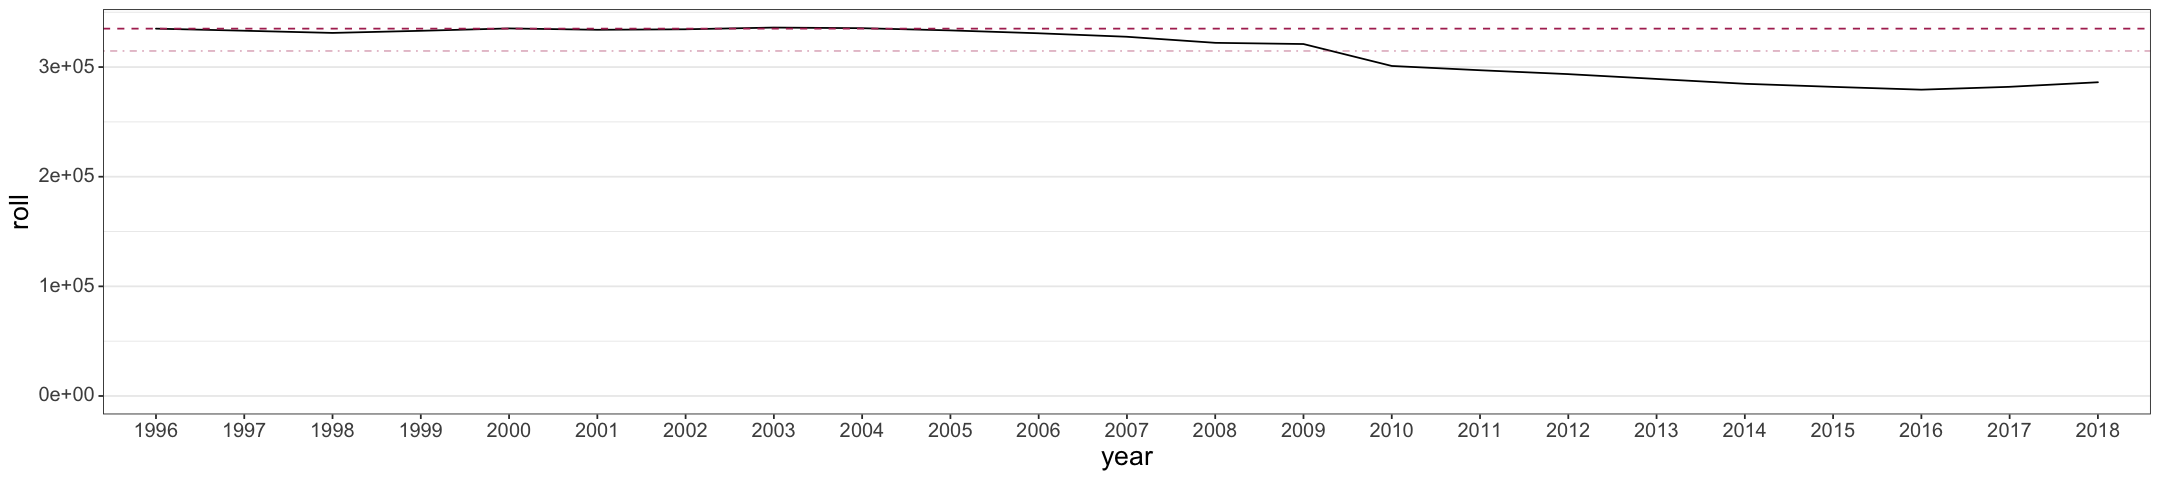

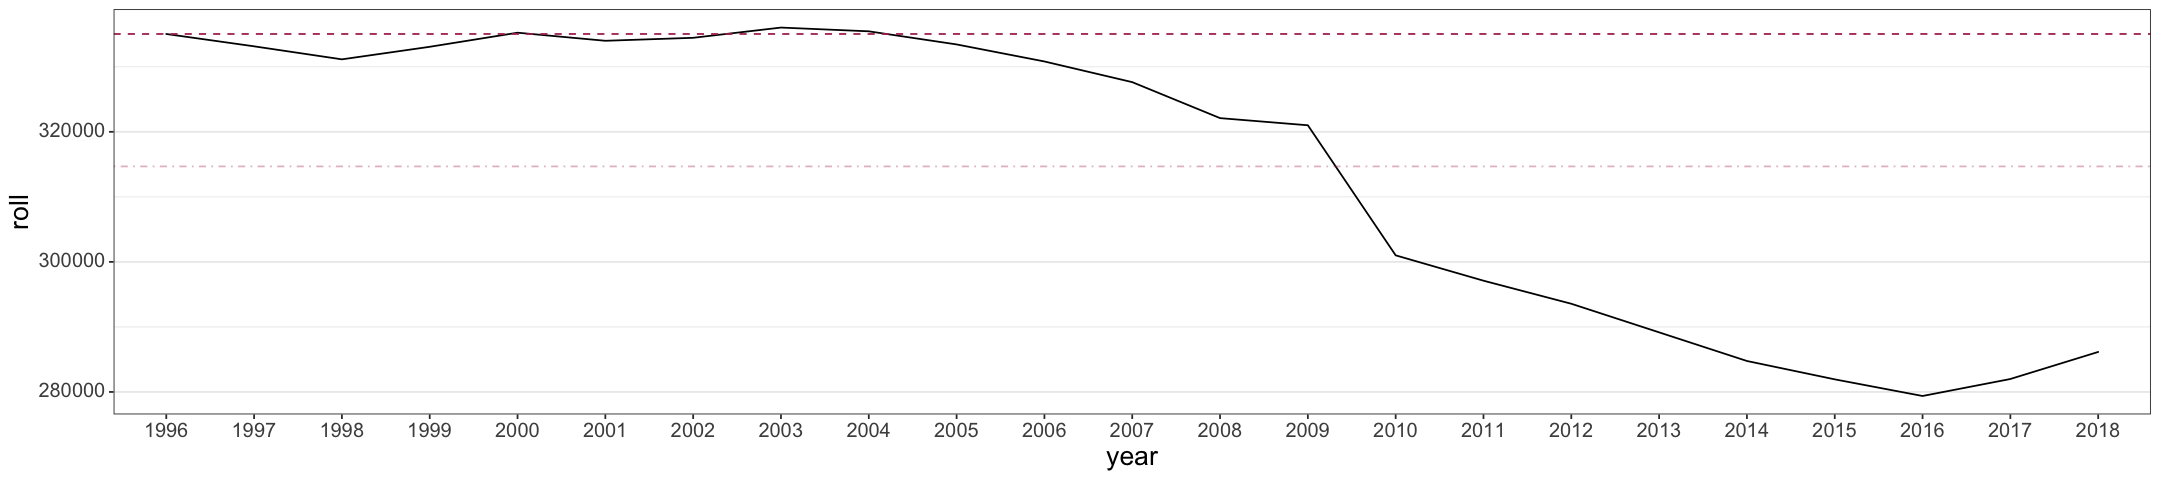

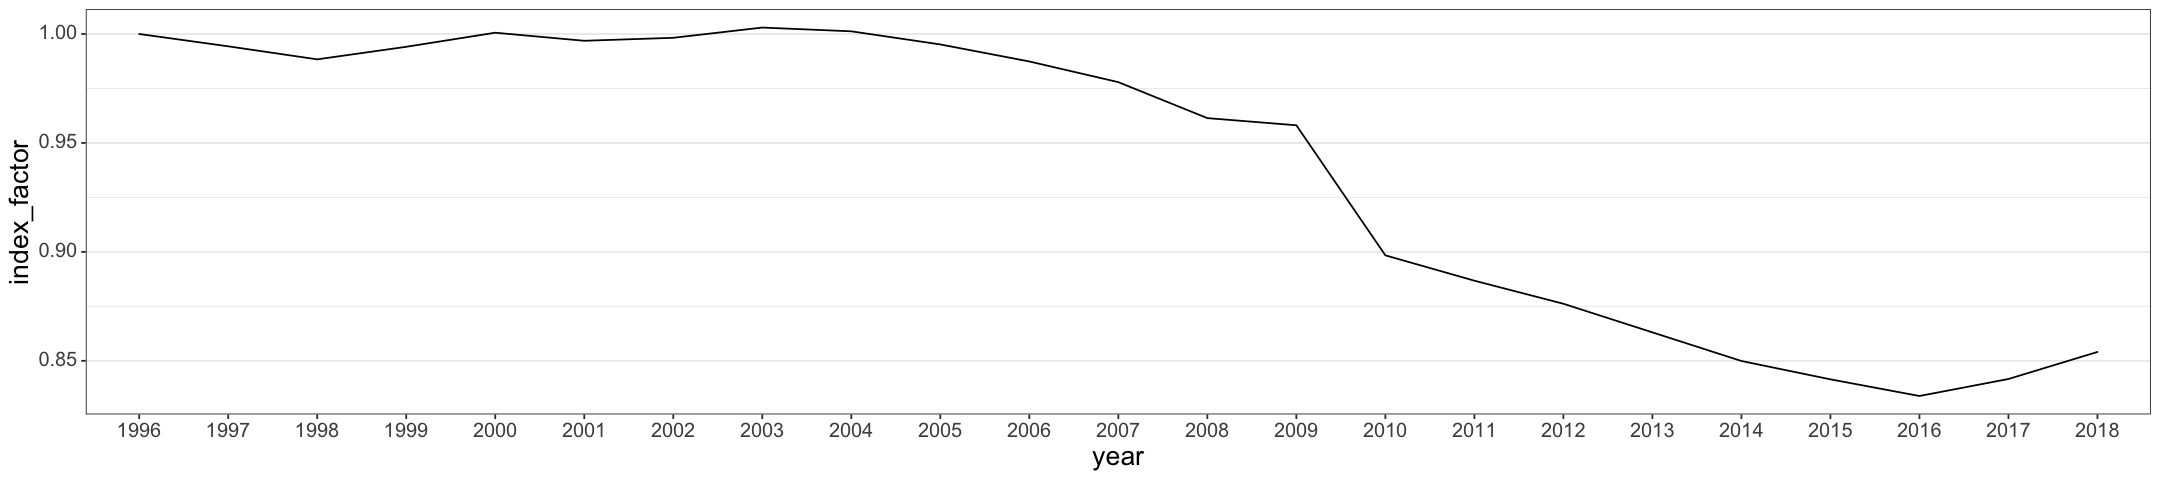

In [9]:
options(repr.plot.width = 18, repr.plot.height = 4)

summary_lines <- index_factors_rolls_1996_2018 %>%
    summarise(
        mean = mean(roll),
        min = min(roll),
        max = max(roll)
    )
summary_lines


index_factors_rolls_1996_2018 %>%

    ggplot(aes(x = year, y = roll, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        geom_hline(aes(yintercept = base_year_roll), colour = "maroon", linetype = "dashed") +
        geom_hline(aes(yintercept = summary_lines$mean), colour = "maroon", alpha = 0.35, linetype = "dotdash") +
        #geom_hline(aes(yintercept = summary_lines$min), colour = "maroon", linetype = "dashed") +
        #geom_linerange(aes(x = NULL, y = mean, xmin = min, xmax = max), data = summary_lines) + 
        expand_limits(y = 0) + 
        
        #scale_y_continuous("Percentage Take-Up of Computing by Females", labels = function(x) scales::percent(abs(x))) + 
        #scale_linetype(guide = FALSE) +
        #scale_colour_discrete(breaks = c("PercentageOfStudents", "PercentageChangeFemales", "GrowthRateFemales")) +
        dressCodeTheme 


index_factors_rolls_1996_2018 %>%

    ggplot(aes(x = year, y = roll, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        geom_hline(aes(yintercept = base_year_roll), colour = "maroon", linetype = "dashed") +
        geom_hline(aes(yintercept = summary_lines$mean), colour = "maroon", alpha = 0.35, linetype = "dotdash") +
        
        dressCodeTheme 



index_factors_rolls_1996_2018 %>%

    ggplot(aes(x = year, y = index_factor, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') +
        dressCodeTheme 


### Census - 1966 - 2020

In [10]:
census_1966_2020 <- read_csv("sta_it_402/data//demographic_data/pupil_teacher_census_1966-2020.csv", trim_ws = T) %>% #, skip_empty_rows = T) # NOT skipping empty rows... :(
                        filter(rowSums(is.na(.)) != ncol(.))

glimpse(census_1966_2020)
head(census_1966_2020)




── Column specification ───────────────────────────────────────────────────────────────────
cols(
  Year = col_double(),
  `primary-schools` = col_number(),
  `primary-pupils` = col_number(),
  `primary-teachers-FTE` = col_number(),
  `secondary-schools` = col_double(),
  `secondary-pupils` = col_number(),
  `secondary-teachers-FTE` = col_number(),
  `special-schools` = col_double(),
  `special-pupils` = col_number(),
  `special-teachers-FTE` = col_number(),
  `centrally_employed-teachers-FTE` = col_character()
)




Rows: 55
Columns: 11
$ Year                              <dbl> 1966, 1967, 1968, 1969, 1970, 1971,…
$ `primary-schools`                 <dbl> NA, 2647, 2622, 2587, 2521, 2526, 2…
$ `primary-pupils`                  <dbl> 601186, 606082, 614780, 622647, 631…
$ `primary-teachers-FTE`            <dbl> NA, 20718, 21696, 21854, 22993, 228…
$ `secondary-schools`               <dbl> NA, 665, 640, 616, 441, 541, 516, 4…
$ `secondary-pupils`                <dbl> 283592, 288054, 295625, 307185, 317…
$ `secondary-teachers-FTE`          <dbl> NA, 19177, 20541, 20259, 21091, 208…
$ `special-schools`                 <dbl> NA, 204, 207, 211, 210, 223, 230, 2…
$ `special-pupils`                  <dbl> 11274, 11641, 11820, 12073, 12190, …
$ `special-teachers-FTE`            <dbl> NA, 1055, 994, 961, 952, 1169, 1236…
$ `centrally_employed-teachers-FTE` <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA,…


Year primary-schools primary-pupils primary-teachers-FTE secondary-schools
1 1966   NA            601186            NA                 NA              
2 1967 2647            606082         20718                665              
3 1968 2622            614780         21696                640              
4 1969 2587            622647         21854                616              
5 1970 2521            631181         22993                441              
6 1971 2526            636250         22878                541              
  secondary-pupils secondary-teachers-FTE special-schools special-pupils
1 283592              NA                   NA             11274         
2 288054           19177                  204             11641         
3 295625           20541                  207             11820         
4 307185           20259                  211             12073         
5 317027           21091                  210             12190         
6 327514           20856                  223             12450         
  special-teachers-FTE centrally_employed-teachers-FTE
1   NA                 NA                             
2 1055                 NA                             
3  994                 NA                             
4  961                 NA                             
5  952                 NA                             
6 1169                 NA

In [11]:
census_1966_2020 <- census_1966_2020 %>%

    mutate_at(vars(everything()), as.integer) %>%
    mutate_at("Year", as.ordered)

head(census_1966_2020, 15)

Warning message:
“Problem with `mutate()` input `centrally_employed-teachers-FTE`.
ℹ NAs introduced by coercion
ℹ Input `centrally_employed-teachers-FTE` is `.Primitive("as.integer")(`centrally_employed-teachers-FTE`)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


Year primary-schools primary-pupils primary-teachers-FTE secondary-schools
1  1966   NA            601186            NA                 NA              
2  1967 2647            606082         20718                665              
3  1968 2622            614780         21696                640              
4  1969 2587            622647         21854                616              
5  1970 2521            631181         22993                441              
6  1971 2526            636250         22878                541              
7  1972 2522            642778         24147                516              
8  1973 2506            644352         25072                492              
9  1974 2524            643095         25945                478              
10 1975 2533            628722         28094                467              
11 1976 2541            619086         27665                464              
12 1977 2548            601453         26876                458              
13 1978 2532            575696         26945                466              
14 1979 2552            551653         27185                468              
15 1980 2543            524889         25846                467              
   secondary-pupils secondary-teachers-FTE special-schools special-pupils
1  283592              NA                   NA             11274         
2  288054           19177                  204             11641         
3  295625           20541                  207             11820         
4  307185           20259                  211             12073         
5  317027           21091                  210             12190         
6  327514           20856                  223             12450         
7  337535           21941                  230             12607         
8  351543           23403                  236             12665         
9  384786           24986                  238             12726         
10 411642           27325                  264             13064         
11 416347           28397                  302             13681         
12 419555           28583                  310             13515         
13 422263           29068                  319             12999         
14 421966           29381                  320             12284         
15 419373           29290                  319             11816         
   special-teachers-FTE centrally_employed-teachers-FTE
1    NA                 NA                             
2  1055                 NA                             
3   994                 NA                             
4   961                 NA                             
5   952                 NA                             
6  1169                 NA                             
7  1236                 NA                             
8  1306                 NA                             
9  1157                 NA                             
10 1343                 NA                             
11 1544                 NA                             
12 1560                 NA                             
13 1630                 NA                             
14 1696                 NA                             
15 1736                 NA

In [12]:
census_1966_2020 <- census_1966_2020 %>%
    
    rename_with(., ~ gsub("-", "_", .))

In [13]:
base_year <- min(census_1966_2020$Year)
base_year

[1] 1966
55 Levels: 1966 < 1967 < 1968 < 1969 < 1970 < 1971 < 1972 < 1973 < ... < 2020

In [14]:
census_1966_2020 %>%
               filter(Year == base_year) %>%
                select(secondary_pupils) %>%
                as.integer

[1] 283592

In [15]:
index_factors_census_1966_2020 <- census_1966_2020 %>%

    select(c(Year, secondary_schools, secondary_pupils)) %>%

    mutate(base_year_census = census_1966_2020 %>%
               filter(Year == base_year) %>%
               select(secondary_pupils) %>%
               as.integer
              ) %>%

    mutate(index_factor = secondary_pupils / base_year_census)
    
head(index_factors_census_1966_2020)

Year secondary_schools secondary_pupils base_year_census index_factor
1 1966  NA               283592           283592           1.000000    
2 1967 665               288054           283592           1.015734    
3 1968 640               295625           283592           1.042431    
4 1969 616               307185           283592           1.083193    
5 1970 441               317027           283592           1.117898    
6 1971 541               327514           283592           1.154877

mean     min    max   
1 328802.7 280983 422263

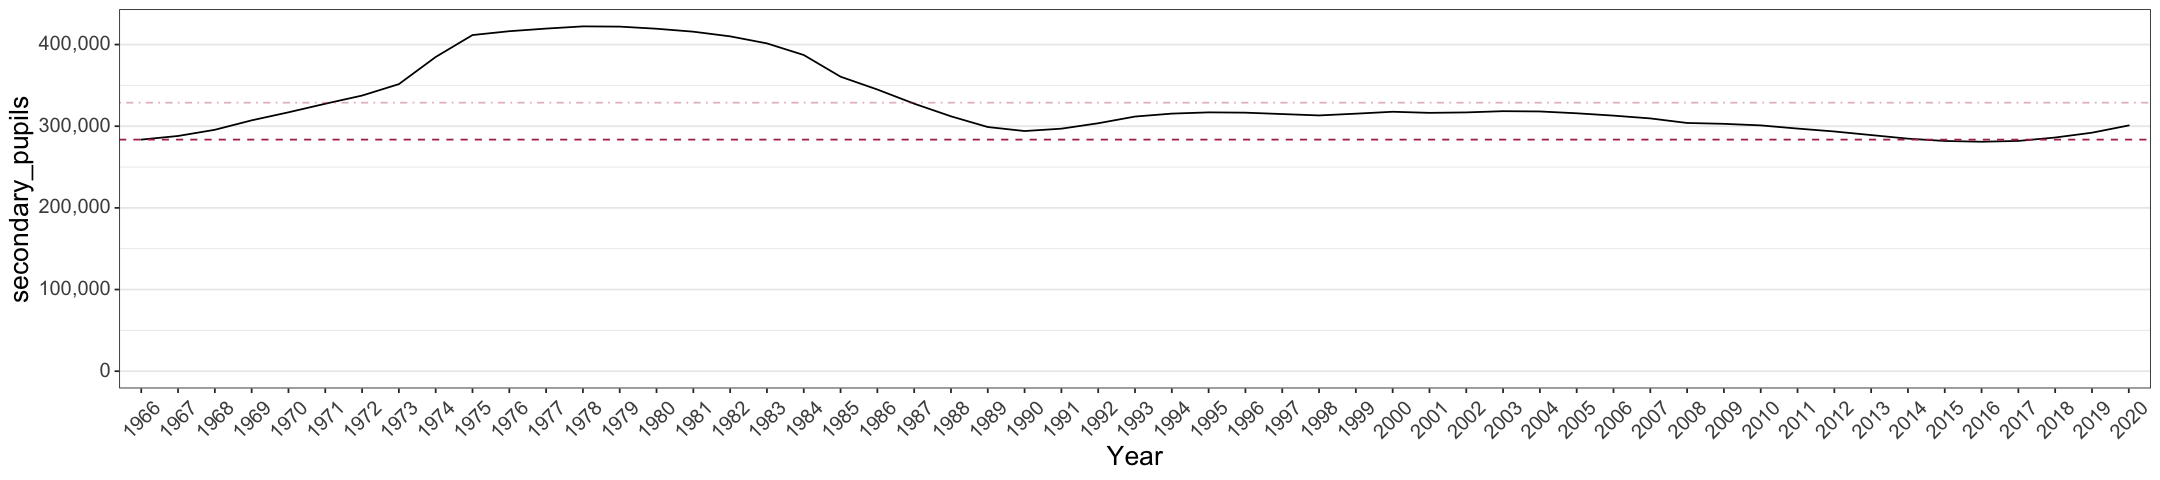

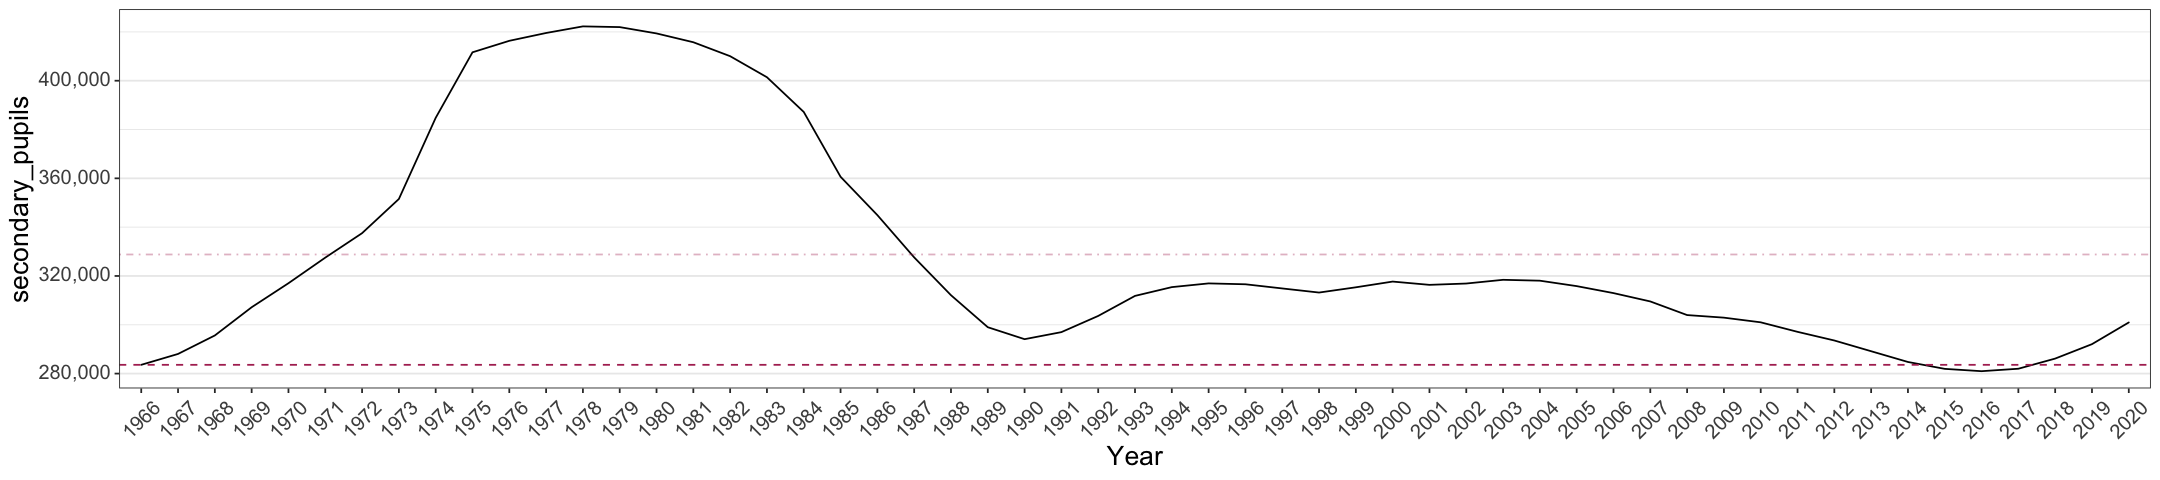

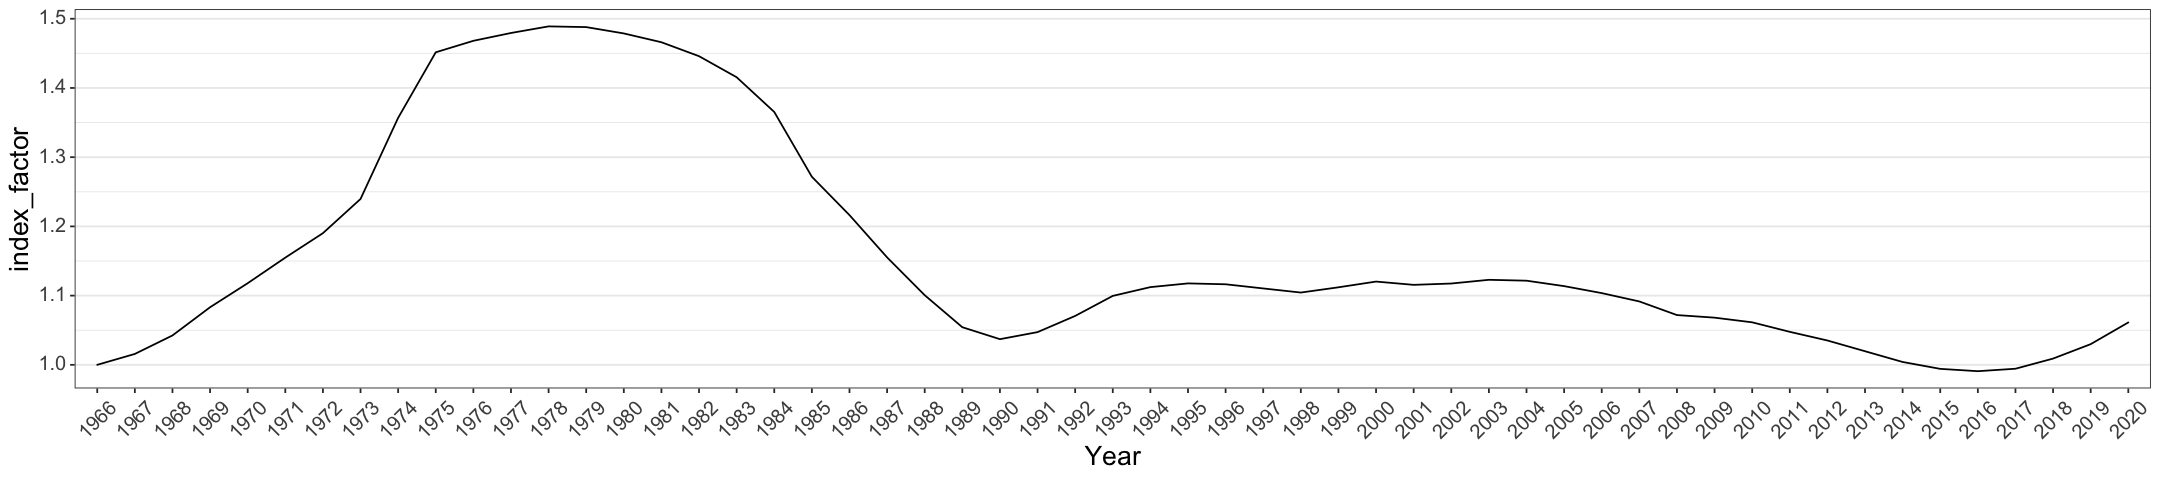

In [16]:
options(repr.plot.width = 18, repr.plot.height = 4)

summary_lines <- index_factors_census_1966_2020 %>%
    summarise(
        mean = mean(secondary_pupils),
        min = min(secondary_pupils),
        max = max(secondary_pupils)
    )
summary_lines


index_factors_census_1966_2020 %>%

    ggplot(aes(x = Year, y = secondary_pupils, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        geom_hline(aes(yintercept = base_year_census), colour = "maroon", linetype = "dashed") +
        geom_hline(aes(yintercept = summary_lines$mean), colour = "maroon", alpha = 0.35, linetype = "dotdash") +
        expand_limits(y = 0) + 

        scale_y_continuous(labels = scales::comma) + #stop auto-conversion to scientific mode
        #scale_x_continuous(breaks = seq(min(index_factors_census_1966_2020$Year), max(index_factors_census_1966_2020$Year), 1)) + 
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5))


index_factors_census_1966_2020 %>%

    ggplot(aes(x = Year, y = secondary_pupils, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        geom_hline(aes(yintercept = base_year_census), colour = "maroon", linetype = "dashed") +
        geom_hline(aes(yintercept = summary_lines$mean), colour = "maroon", alpha = 0.35, linetype = "dotdash") +

        scale_y_continuous(labels = scales::comma) + #stop auto-conversion to scientific mode
        #scale_x_continuous(breaks = seq(min(index_factors_census_1966_2020$Year), max(index_factors_census_1966_2020$Year), 1)) + 
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 



index_factors_census_1966_2020 %>%

    ggplot(aes(x = Year, y = index_factor, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') +
        #scale_x_continuous(breaks = seq(min(index_factors_census_1966_2020$Year), max(index_factors_census_1966_2020$Year), 1)) + 
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 



In [17]:
# revert back to base year falling within both datasets
# - use same base year as school rolls 1996-2018 so can directly compare

base_year <- as.integer(levels(school_rolls_1996_2018$year)[1])
base_year

[1] 1996

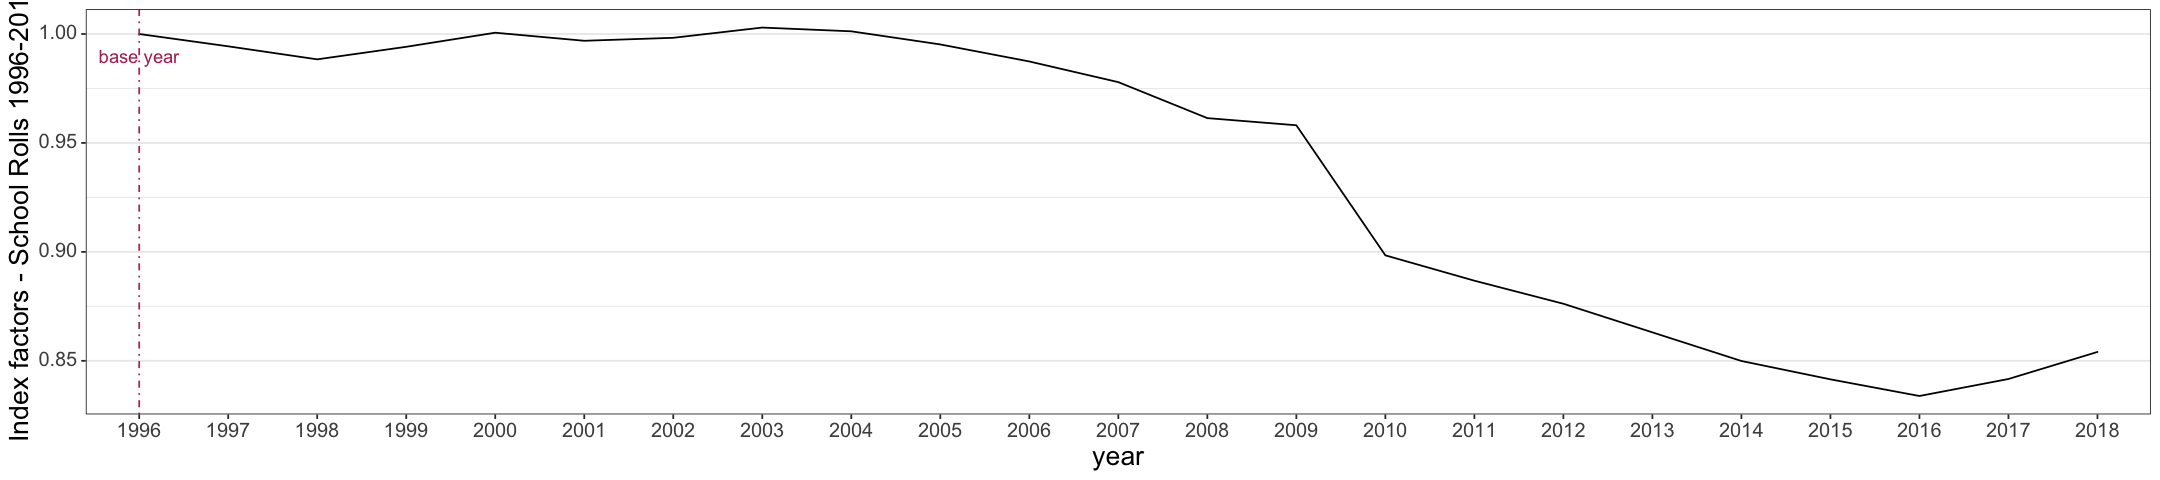

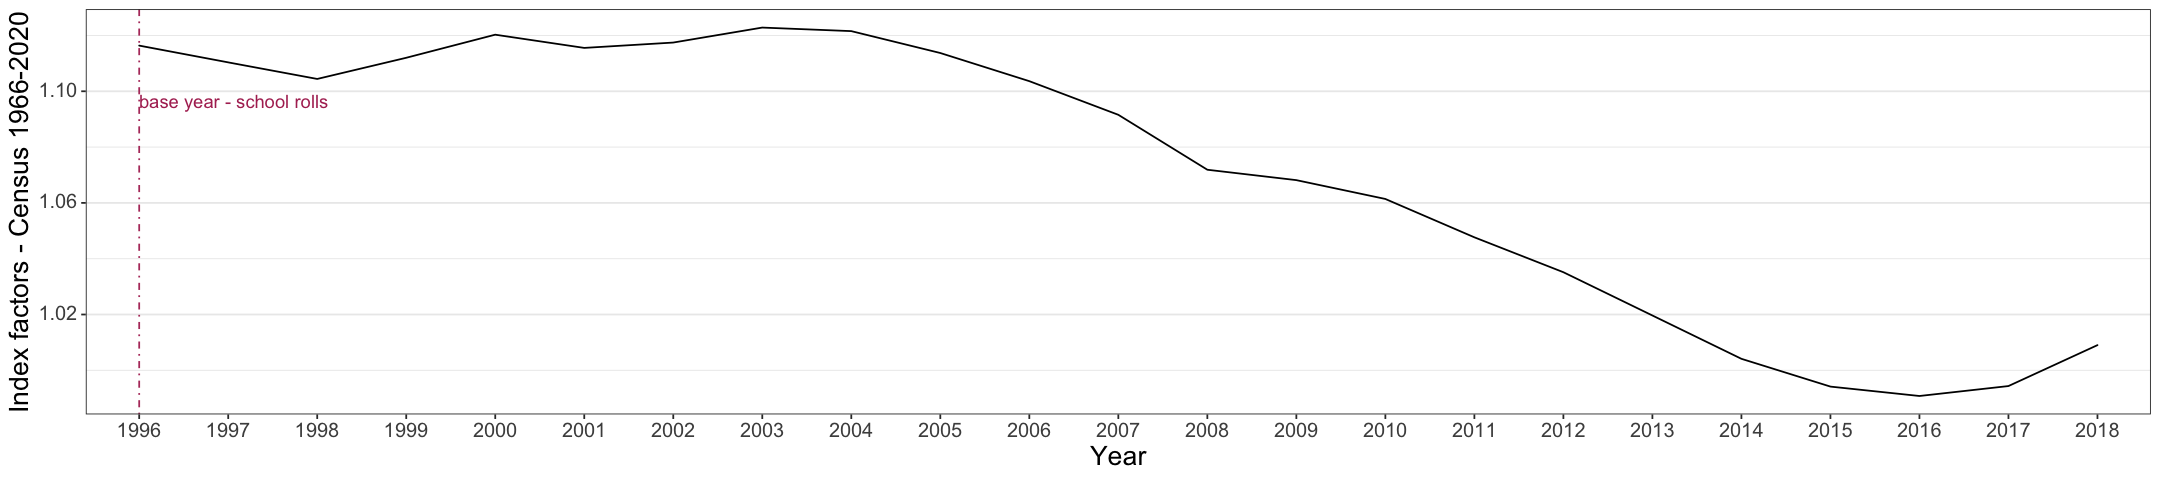

In [18]:
index_factors_rolls_1996_2018 %>%

    ggplot(aes(x = year, y = index_factor, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') +
        geom_vline(aes(xintercept = as.character(base_year)), colour = "maroon", alpha = 0.95, linetype = "dotdash")+
        annotate(geom = "text", 
                 x = as.character(base_year), 
                 y = as.numeric(index_factors_rolls_1996_2018[which(index_factors_rolls_1996_2018$year == base_year), c("index_factor")]) - 0.01, 
                 label = "base year",  
                 colour = "maroon") +
        ylab("Index factors - School Rolls 1996-2018") + 
        dressCodeTheme 


index_factors_census_1966_2020 %>%
    filter((Year >= 1996) & (Year <= 2018)) %>%
        #index_factors_census_1966_2020, between(min(index_factors_rolls_1996_2018$year), max(index_factors_rolls_1996_2018$year)) %>%

    ggplot(aes(x = Year, y = index_factor, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') +
        geom_vline(aes(xintercept = as.character(base_year)), colour = "maroon", alpha = 0.95, linetype = "dotdash") +
        annotate(geom = "text", 
                 x = as.character(base_year), 
                 y = as.numeric(index_factors_census_1966_2020[which(index_factors_census_1966_2020$Year == base_year), 
                                                                 c("index_factor")]) - 0.02, 
                 label = "base year - school rolls", hjust = "left",
                 colour = "maroon") +
        ylab("Index factors - Census 1966-2020") + 
        dressCodeTheme


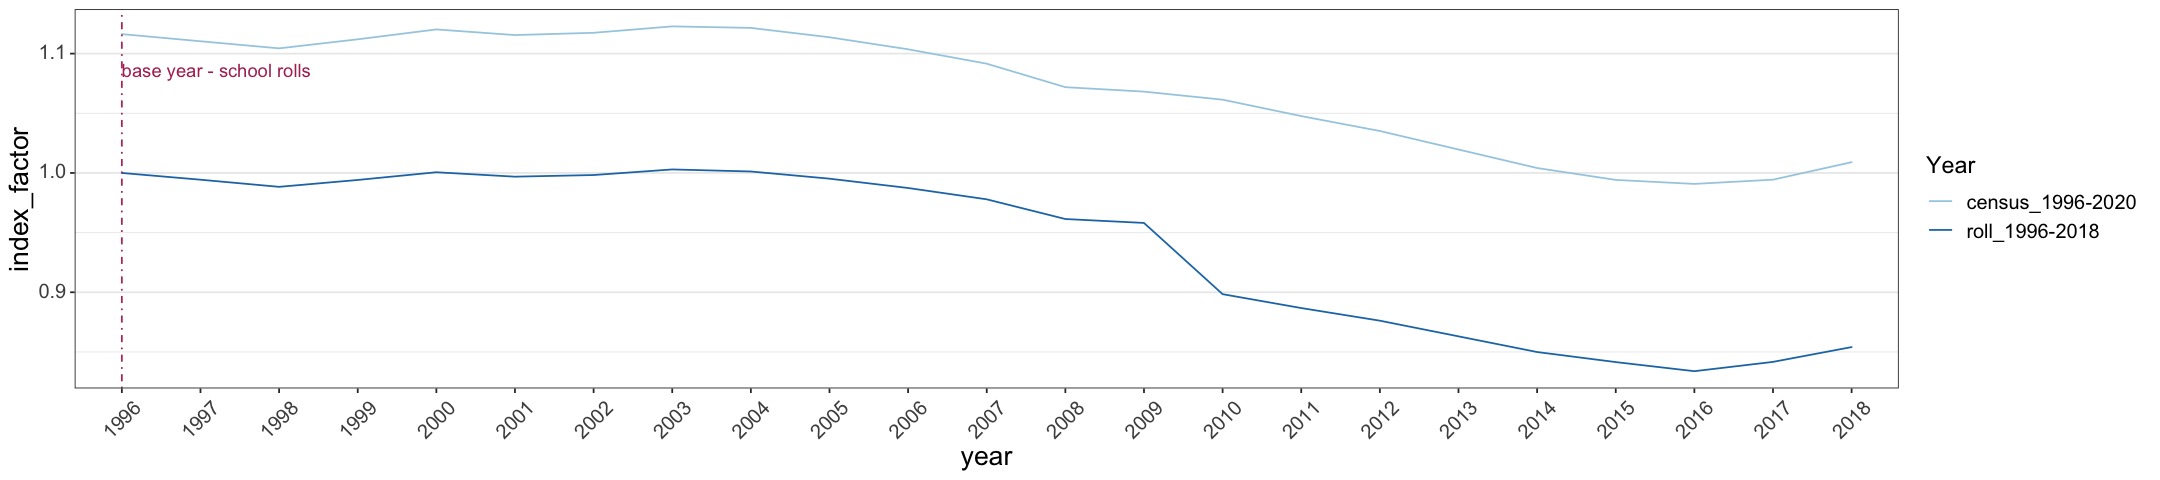

In [19]:
bind_rows(

    index_factors_rolls_1996_2018 %>%
        mutate(dataset = "roll_1996-2018") %>%
        mutate_at("year", as.character) %>%
        mutate_at("year", as.integer) %>%
        select(dataset, everything()),

    index_factors_census_1966_2020 %>%

        rename(year = Year) %>%
        mutate_at("year", as.character) %>%
        mutate_at("year", as.integer) %>%
        rename(base_year_roll = base_year_census) %>%
        rename(roll = secondary_pupils) %>%
        mutate(dataset = "census_1996-2020") %>%
        select(dataset, everything())
    
    ) %>%
    mutate_at("year", as.ordered) %>%
    filter((year >= 1996) & (year <= 2018)) %>%

    ggplot(aes(x = year, y = index_factor, group = dataset, colour = dataset)) +  
        geom_line(lineend = 'round', linejoin = 'round') +
        geom_vline(aes(xintercept = as.character(base_year)), colour = "maroon", alpha = 0.95, linetype = "dotdash") +
        annotate(geom = "text", 
                 x = as.character(base_year), 
                 y = as.numeric(index_factors_census_1966_2020[which(index_factors_census_1966_2020$Year == base_year), 
                                                                 c("index_factor")]) - 0.03, 
                 label = "base year - school rolls", hjust = "left",
                 colour = "maroon") +
         
        scale_colour_brewer(name = "Year", palette = "Paired") +
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 




In [20]:
# reindex to use same base year as school rolls 1996-2018 so can directly compare

index_factors_census_1966_2020 <- census_1966_2020 %>%

    select(c(Year, secondary_schools, secondary_pupils)) %>%

    mutate(base_year_census = census_1966_2020 %>%
               filter(Year == base_year) %>%
               select(secondary_pupils) %>%
               as.integer
              ) %>%

    mutate(index_factor = secondary_pupils / base_year_census)
    
head(census_1966_2020)
head(index_factors_census_1966_2020)

index_factors_census_1966_2020 %>%
    filter((Year >= (base_year - 5)) & (Year <= (base_year + 5)))


Year primary_schools primary_pupils primary_teachers_FTE secondary_schools
1 1966   NA            601186            NA                 NA              
2 1967 2647            606082         20718                665              
3 1968 2622            614780         21696                640              
4 1969 2587            622647         21854                616              
5 1970 2521            631181         22993                441              
6 1971 2526            636250         22878                541              
  secondary_pupils secondary_teachers_FTE special_schools special_pupils
1 283592              NA                   NA             11274         
2 288054           19177                  204             11641         
3 295625           20541                  207             11820         
4 307185           20259                  211             12073         
5 317027           21091                  210             12190         
6 327514           20856                  223             12450         
  special_teachers_FTE centrally_employed_teachers_FTE
1   NA                 NA                             
2 1055                 NA                             
3  994                 NA                             
4  961                 NA                             
5  952                 NA                             
6 1169                 NA

Year secondary_schools secondary_pupils base_year_census index_factor
1 1966  NA               283592           316594           0.8957592   
2 1967 665               288054           316594           0.9098530   
3 1968 640               295625           316594           0.9337669   
4 1969 616               307185           316594           0.9702805   
5 1970 441               317027           316594           1.0013677   
6 1971 541               327514           316594           1.0344921

Year secondary_schools secondary_pupils base_year_census index_factor
1  1991 420               296991           316594           0.9380816   
2  1992 414               303624           316594           0.9590327   
3  1993 410               311833           316594           0.9849618   
4  1994 407               315430           316594           0.9963234   
5  1995 406               316957           316594           1.0011466   
6  1996 403               316594           316594           1.0000000   
7  1997 401               314889           316594           0.9946146   
8  1998 392               313204           316594           0.9892923   
9  1999 389               315356           316594           0.9960896   
10 2000 389               317704           316594           1.0035061   
11 2001 387               316359           316594           0.9992577

In [21]:
tmp_df <- bind_rows(

    index_factors_rolls_1996_2018 %>%
        mutate(dataset = "roll_1996-2018") %>%
        mutate_at("year", as.character) %>%
        mutate_at("year", as.integer) %>%
        select(dataset, everything()),

    index_factors_census_1966_2020 %>%

        rename(year = Year) %>%
        mutate_at("year", as.character) %>%
        mutate_at("year", as.integer) %>%
        rename(base_year_roll = base_year_census) %>%
        rename(roll = secondary_pupils) %>%
        mutate(dataset = "census_1996-2020") %>%
        select(dataset, everything())
    
    ) %>%
    mutate_at("year", as.ordered) 

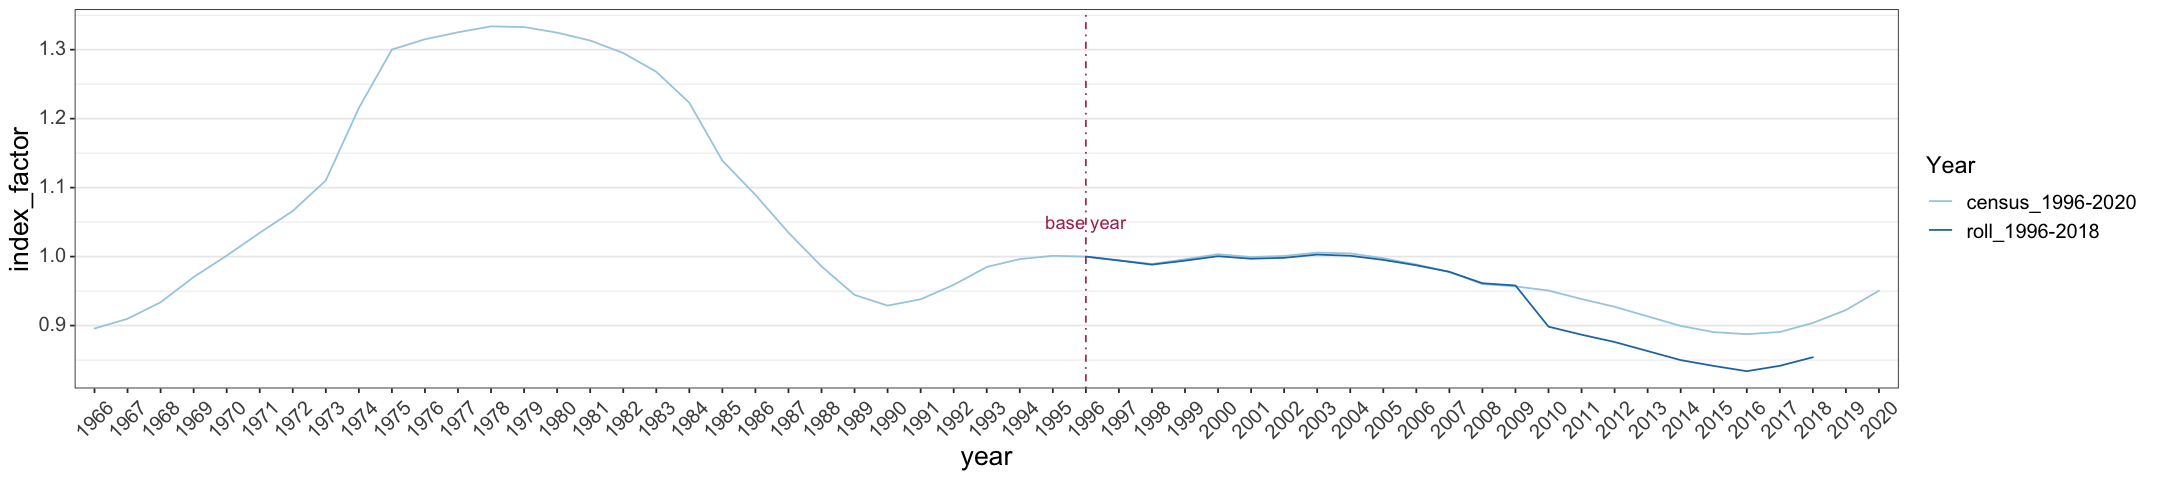

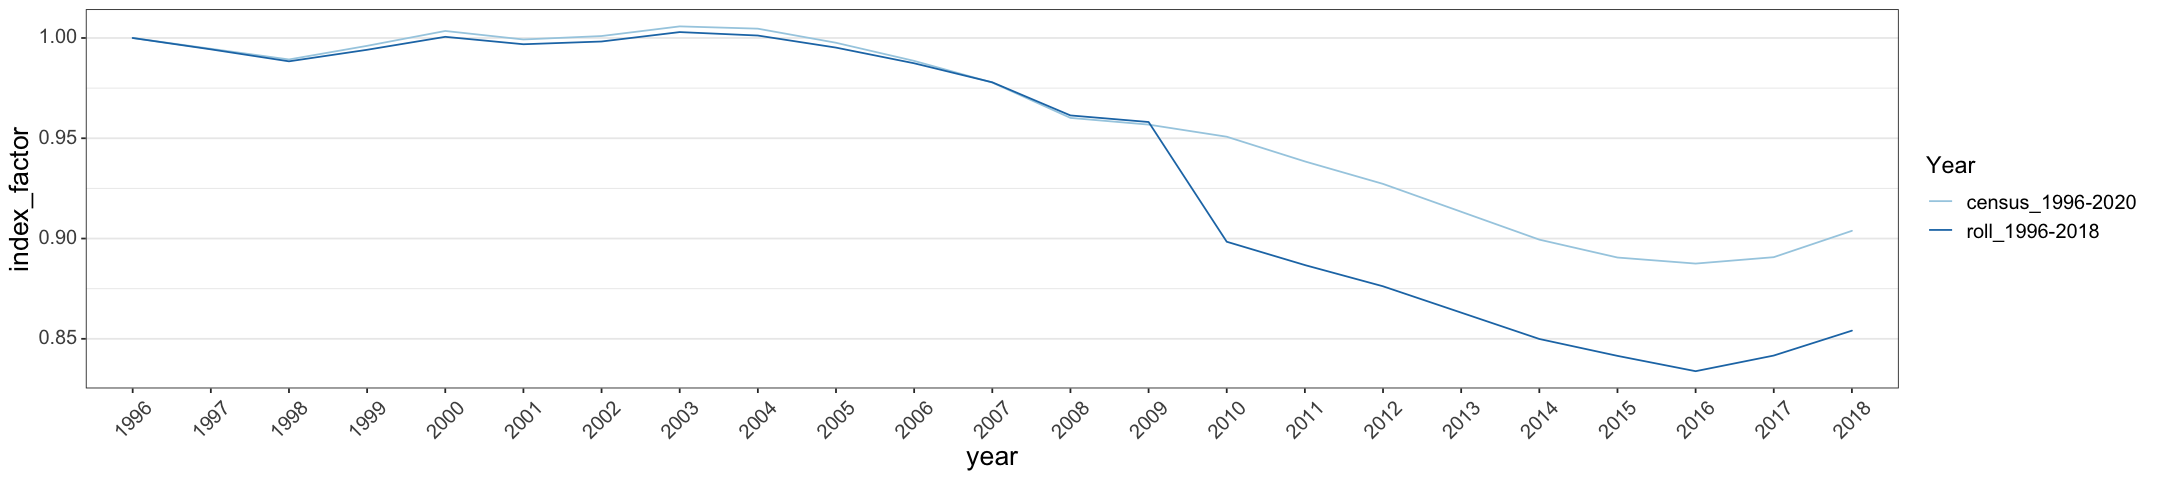

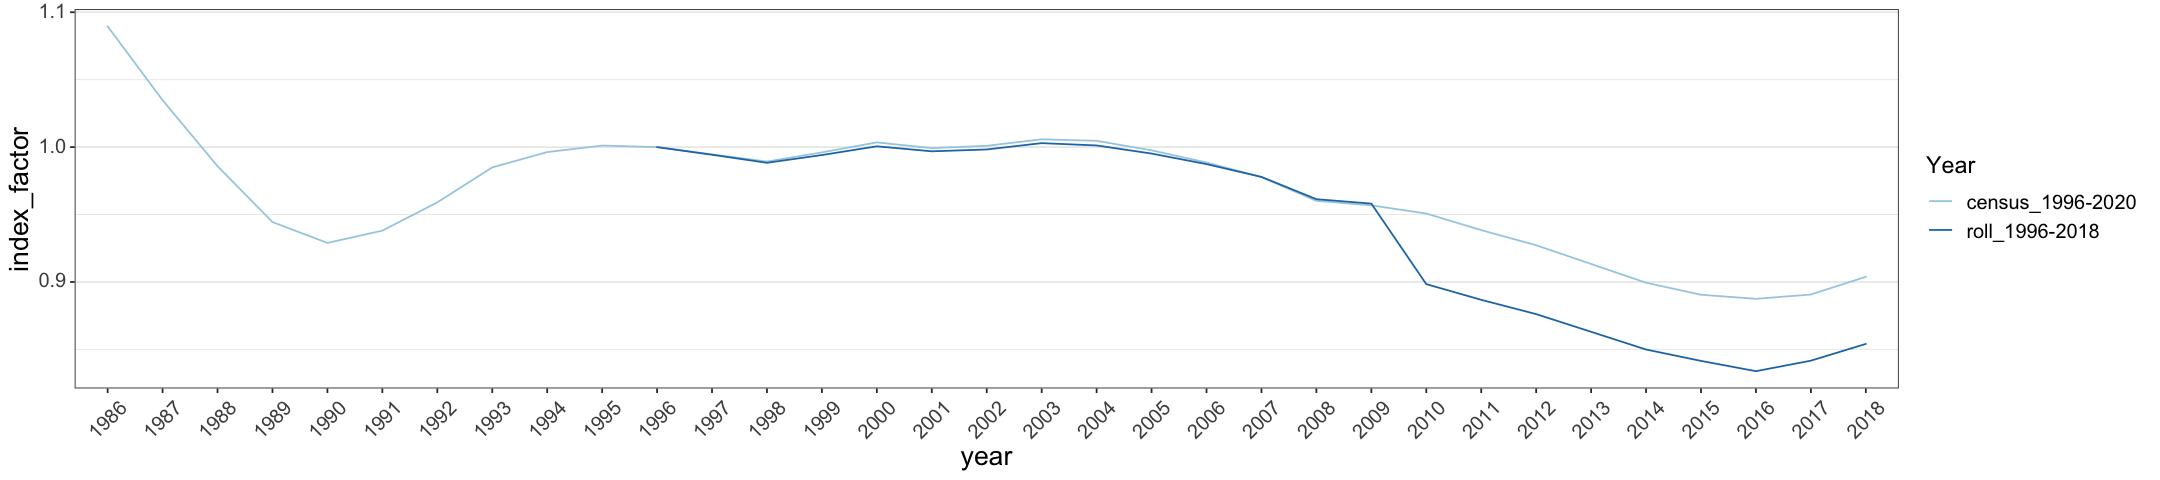

In [22]:
tmp_df %>%

    ggplot(aes(x = year, y = index_factor, group = dataset, colour = dataset)) +  
        geom_line(lineend = 'round', linejoin = 'round') +

        geom_vline(aes(xintercept = as.character(base_year)), colour = "maroon", alpha = 0.95, linetype = "dotdash") +
        annotate(geom = "text", 
                 x = as.character(base_year), 
                 y = as.numeric(tmp_df[which(tmp_df$year == base_year), c("index_factor")][1, ]) + 0.05, 
                 label = "base year",  
                 colour = "maroon") +

        scale_colour_brewer(name = "Year", palette = "Paired") + #, direction = -1) +
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 


tmp_df %>%
    filter((year >= 1996) & (year <= 2018)) %>%

    ggplot(aes(x = year, y = index_factor, group = dataset, colour = dataset)) +  
        geom_line(lineend = 'round', linejoin = 'round') +

        scale_colour_brewer(name = "Year", palette = "Paired") +
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 


tmp_df %>%
    filter((year >= 1986) & (year <= 2018)) %>%

    ggplot(aes(x = year, y = index_factor, group = dataset, colour = dataset)) +  
        geom_line(lineend = 'round', linejoin = 'round') +

        scale_colour_brewer(name = "Year", palette = "Paired") +
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 

### Local Authority Censuses  - Teachers & Pupils 1995 - 2020

    * data from historical censuses 1966-2020 - local authority data captured from 1995

In [23]:
head(census_1966_2020)
head(index_factors_by_local_authority)

Year primary_schools primary_pupils primary_teachers_FTE secondary_schools
1 1966   NA            601186            NA                 NA              
2 1967 2647            606082         20718                665              
3 1968 2622            614780         21696                640              
4 1969 2587            622647         21854                616              
5 1970 2521            631181         22993                441              
6 1971 2526            636250         22878                541              
  secondary_pupils secondary_teachers_FTE special_schools special_pupils
1 283592              NA                   NA             11274         
2 288054           19177                  204             11641         
3 295625           20541                  207             11820         
4 307185           20259                  211             12073         
5 317027           21091                  210             12190         
6 327514           20856                  223             12450         
  special_teachers_FTE centrally_employed_teachers_FTE
1   NA                 NA                             
2 1055                 NA                             
3  994                 NA                             
4  961                 NA                             
5  952                 NA                             
6 1169                 NA

LocalAuthorityCode LocalAuthority year roll  base_year_roll index_factor
1 100                Aberdeen City  1996 12564 12564          1.000000    
2 100                Aberdeen City  1997 12736 12564          1.013690    
3 100                Aberdeen City  1998 12698 12564          1.010665    
4 100                Aberdeen City  1999 12632 12564          1.005412    
5 100                Aberdeen City  2000 12564 12564          1.000000    
6 100                Aberdeen City  2001 12589 12564          1.001990

#### Pupil Cohorts

In [237]:
getCohort <- 
    function(level, year) {
        
        if (!str_detect(level, "^\\bS[1-6]\\b$") | !str_detect(year, "\\b\\d{4}\\b"))
            return(NA)
        
        cohort <- as.integer(year - (as.integer(str_sub(level, 2, 2)) - 1))     
        invisible(cohort)        
    }


In [275]:
getCohortLabel <- 
    function(level, year) {               
        
        if (!str_detect(level, "^\\bS[1-6]\\b$") | !str_detect(year, "\\b\\d{4}\\b"))
            return(NA)
        # don't get this - fails correctly when called independently but doesn't in df
        
        cohort <- as.integer(year - (as.integer(str_sub(level, 2, 2)) - 1))  
        if (is.na(cohort)) 
            return(NA)
        
        invisible(paste("S1", cohort, sep = "-"))                
    }
        

(getCohortLabel("S1", 1995))
(getCohortLabel("S2", 1995))
(getCohortLabel("S2", 1996))
(getCohortLabel("D2", 1995))
(getCohortLabel("special_units", 1995))

head(historical_census_pupils_by_la_and_level_1995_2020, 12) %>%

    #drop_na(cohort) %>%
    mutate(cohortLabel = getCohortLabel(level, as.integer(as.character(year))))

[1] "S1-1995"

[1] "S1-1994"

[1] "S1-1995"

[1] NA

[1] NA

Warning message:
“Problem with `mutate()` input `cohortLabel`.
ℹ the condition has length > 1 and only the first element will be used
ℹ Input `cohortLabel` is `getCohortLabel(level, as.integer(as.character(year)))`.”
Warning message in if (!str_detect(level, "^\\bS[1-6]\\b$") | !str_detect(year, :
“the condition has length > 1 and only the first element will be used”
Warning message:
“Problem with `mutate()` input `cohortLabel`.
ℹ the condition has length > 1 and only the first element will be used
ℹ Input `cohortLabel` is `getCohortLabel(level, as.integer(as.character(year)))`.”
Warning message in if (is.na(cohort)) return(NA):
“the condition has length > 1 and only the first element will be used”


LocalAuthority year level cohort roll cohortLabel
1  Aberdeen City  1995 S1    1995   2111 S1-1995    
2  Aberdeen City  1995 S2    1994   2210 S1-1994    
3  Aberdeen City  1995 S3    1993   2203 S1-1993    
4  Aberdeen City  1995 S4    1992   2129 S1-1992    
5  Aberdeen City  1995 S5    1991   1635 S1-1991    
6  Aberdeen City  1995 S6    1990    747 S1-1990    
7  Aberdeen City  1996 S1    1996   2160 S1-1996    
8  Aberdeen City  1996 S2    1995   2120 S1-1995    
9  Aberdeen City  1996 S3    1994   2206 S1-1994    
10 Aberdeen City  1996 S4    1993   2173 S1-1993    
11 Aberdeen City  1996 S5    1992   1554 S1-1992

In [243]:
historical_census_pupils_by_la_and_level_1995_2020 <- read_csv("sta_it_402/data/demographic_data/sec_pupils_la_census_by_level_1995-2020.csv", trim_ws = T) %>% #, skip_empty_rows = T) # NOT skipping empty rows... :(
                    filter(rowSums(is.na(.)) != ncol(.))

glimpse(historical_census_pupils_by_la_and_level_1995_2020)
head(historical_census_pupils_by_la_and_level_1995_2020)



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_number(),
  LocalAuthority = col_character(),
  `1995-special_units` = col_double(),
  `1996-special_units` = col_double(),
  `1997-special_units` = col_double(),
  `1998-special_units` = col_double(),
  `1999-special_units` = col_character(),
  `2000-special_units` = col_character(),
  `2001-special_units` = col_character(),
  `2002-StageNotKnown` = col_double(),
  `2003-StageNotKnown` = col_double()
)
ℹ Use `spec()` for the full column specifications.




Rows: 32
Columns: 166
$ LocalAuthority       <chr> "Aberdeen City", "Aberdeenshire", "Angus", "Argy…
$ `1995-S1`            <dbl> 2111, 2957, 1422, 1053, 3469, 555, 1746, 1709, 1…
$ `1995-S2`            <dbl> 2210, 2797, 1373, 1071, 3531, 566, 1846, 1693, 1…
$ `1995-S3`            <dbl> 2203, 3001, 1424, 1075, 3547, 556, 1921, 1806, 1…
$ `1995-S4`            <dbl> 2129, 3027, 1395, 1069, 3540, 598, 1862, 1736, 1…
$ `1995-S5`            <dbl> 1635, 2329, 1004, 927, 2828, 416, 1314, 1230, 11…
$ `1995-S6`            <dbl> 747, 1186, 582, 526, 1421, 243, 796, 632, 624, 7…
$ `1995-special_units` <dbl> 36, 44, 8, 9, 14, 10, 37, 36, NA, NA, NA, NA, 10…
$ `1996-S1`            <dbl> 2160, 2817, 1412, 1001, 3691, 559, 1912, 1776, 1…
$ `1996-S2`            <dbl> 2120, 2930, 1414, 1054, 3437, 548, 1731, 1723, 1…
$ `1996-S3`            <dbl> 2206, 2801, 1343, 1068, 3517, 572, 1840, 1710, 1…
$ `1996-S4`            <dbl> 2173, 2983, 1414, 1060, 3488, 550, 1909, 1799, 1…
$ `1996-S5`            <dbl> 1

LocalAuthority    1995-S1 1995-S2 1995-S3 1995-S4 1995-S5 1995-S6
1 Aberdeen City     2111    2210    2203    2129    1635     747   
2 Aberdeenshire     2957    2797    3001    3027    2329    1186   
3 Angus             1422    1373    1424    1395    1004     582   
4 Argyll & Bute     1053    1071    1075    1069     927     526   
5 City of Edinburgh 3469    3531    3547    3540    2828    1421   
6 Clackmannanshire   555     566     556     598     416     243   
  1995-special_units 1996-S1 1996-S2 ⋯ 2019-S3 2019-S4 2019-S5 2019-S6 2020-S1
1 36                 2160    2120    ⋯ 1719    1615    1289     815    1930   
2 44                 2817    2930    ⋯ 2719    2727    2224    1402    2924   
3  8                 1412    1414    ⋯ 1214    1174    1050     606    1323   
4  9                 1001    1054    ⋯  778     830     705     463     854   
5 14                 3691    3437    ⋯ 3528    3334    2956    2189    4125   
6 10                  559     548    ⋯  457     463     362     272     518   
  2020-S2 2020-S3 2020-S4 2020-S5 2020-S6
1 1890    1794    1736    1432     814   
2 2840    2867    2722    2326    1453   
3 1272    1186    1215     986     731   
4  806     804     772     770     523   
5 4018    3746    3549    3047    2384   
6  537     465     451     412     233

In [245]:
historical_census_pupils_by_la_and_level_1995_2020 <- historical_census_pupils_by_la_and_level_1995_2020 %>%
    
    mutate_at(vars(matches(regex("\\b\\d{4}\\b"))), as.character) %>%
    mutate_at(vars(matches(regex("\\b\\d{4}\\b"))), parse_number) %>%
    mutate_at(vars(matches(regex("\\b\\d{4}\\b"))), as.integer) %>%

    pivot_longer(matches(regex("\\b\\d{4}\\b")), names_to = "year", values_to = "roll") %>%
    separate("year", c("year", "level"), extra = "merge") %>%
    mutate_at(vars(LocalAuthority, level), as.factor) %>%
    mutate_at(c("year"), as.ordered) %>%

    mutate(cohort = getCohort(level, as.integer(as.character(year)))) %>%
    relocate(cohort, .after = level)

head(historical_census_pupils_by_la_and_level_1995_2020, 15)


Warning message:
“Problem with `mutate()` input `1999-special_units`.
ℹ 1 parsing failure.
row col expected actual
  3  -- a number      .

ℹ Input `1999-special_units` is `(function (x, na = c("", "NA"), locale = default_locale(), trim_ws = TRUE) ...`.”
Warning message:
“1 parsing failure.
row col expected actual
  3  -- a number      .
”
Warning message:
“Problem with `mutate()` input `2000-special_units`.
ℹ 2 parsing failures.
row col expected actual
 29  -- a number      .
 31  -- a number      .

ℹ Input `2000-special_units` is `(function (x, na = c("", "NA"), locale = default_locale(), trim_ws = TRUE) ...`.”
Warning message:
“2 parsing failures.
row col expected actual
 29  -- a number      .
 31  -- a number      .
”
Warning message:
“Problem with `mutate()` input `2001-special_units`.
ℹ 1 parsing failure.
row col expected actual
 31  -- a number      .

ℹ Input `2001-special_units` is `(function (x, na = c("", "NA"), locale = default_locale(), trim_ws = TRUE) ...`.”
Warning mes

LocalAuthority year level         cohort roll
1  Aberdeen City  1995 S1            1995   2111
2  Aberdeen City  1995 S2            1994   2210
3  Aberdeen City  1995 S3            1993   2203
4  Aberdeen City  1995 S4            1992   2129
5  Aberdeen City  1995 S5            1991   1635
6  Aberdeen City  1995 S6            1990    747
7  Aberdeen City  1995 special_units   NA     36
8  Aberdeen City  1996 S1            1996   2160
9  Aberdeen City  1996 S2            1995   2120
10 Aberdeen City  1996 S3            1994   2206
11 Aberdeen City  1996 S4            1993   2173
12 Aberdeen City  1996 S5            1992   1554
13 Aberdeen City  1996 S6            1991    847
14 Aberdeen City  1996 special_units   NA     14
15 Aberdeen City  1997 S1            1997   2246

Warning message:
“Problem with `mutate()` input `cohort`.
ℹ the condition has length > 1 and only the first element will be used
ℹ Input `cohort` is `getCohort(level, as.integer(as.character(year)))`.”
Warning message in if (!str_detect(level, "^\\bS[1-6]\\b$") | !str_detect(year, :
“the condition has length > 1 and only the first element will be used”
Warning message:
“Problem with `mutate()` input `cohortLabel`.
ℹ the condition has length > 1 and only the first element will be used
ℹ Input `cohortLabel` is `getCohortLabel(level, as.integer(as.character(year)))`.”
Warning message in if (!str_detect(level, "^\\bS[1-6]\\b$") | !str_detect(year, :
“the condition has length > 1 and only the first element will be used”
Warning message:
“Problem with `mutate()` input `cohortLabel`.
ℹ the condition has length > 1 and only the first element will be used
ℹ Input `cohortLabel` is `getCohortLabel(level, as.integer(as.character(year)))`.”
Warning message in if (is.na(cohort)) return(NA):
“the con

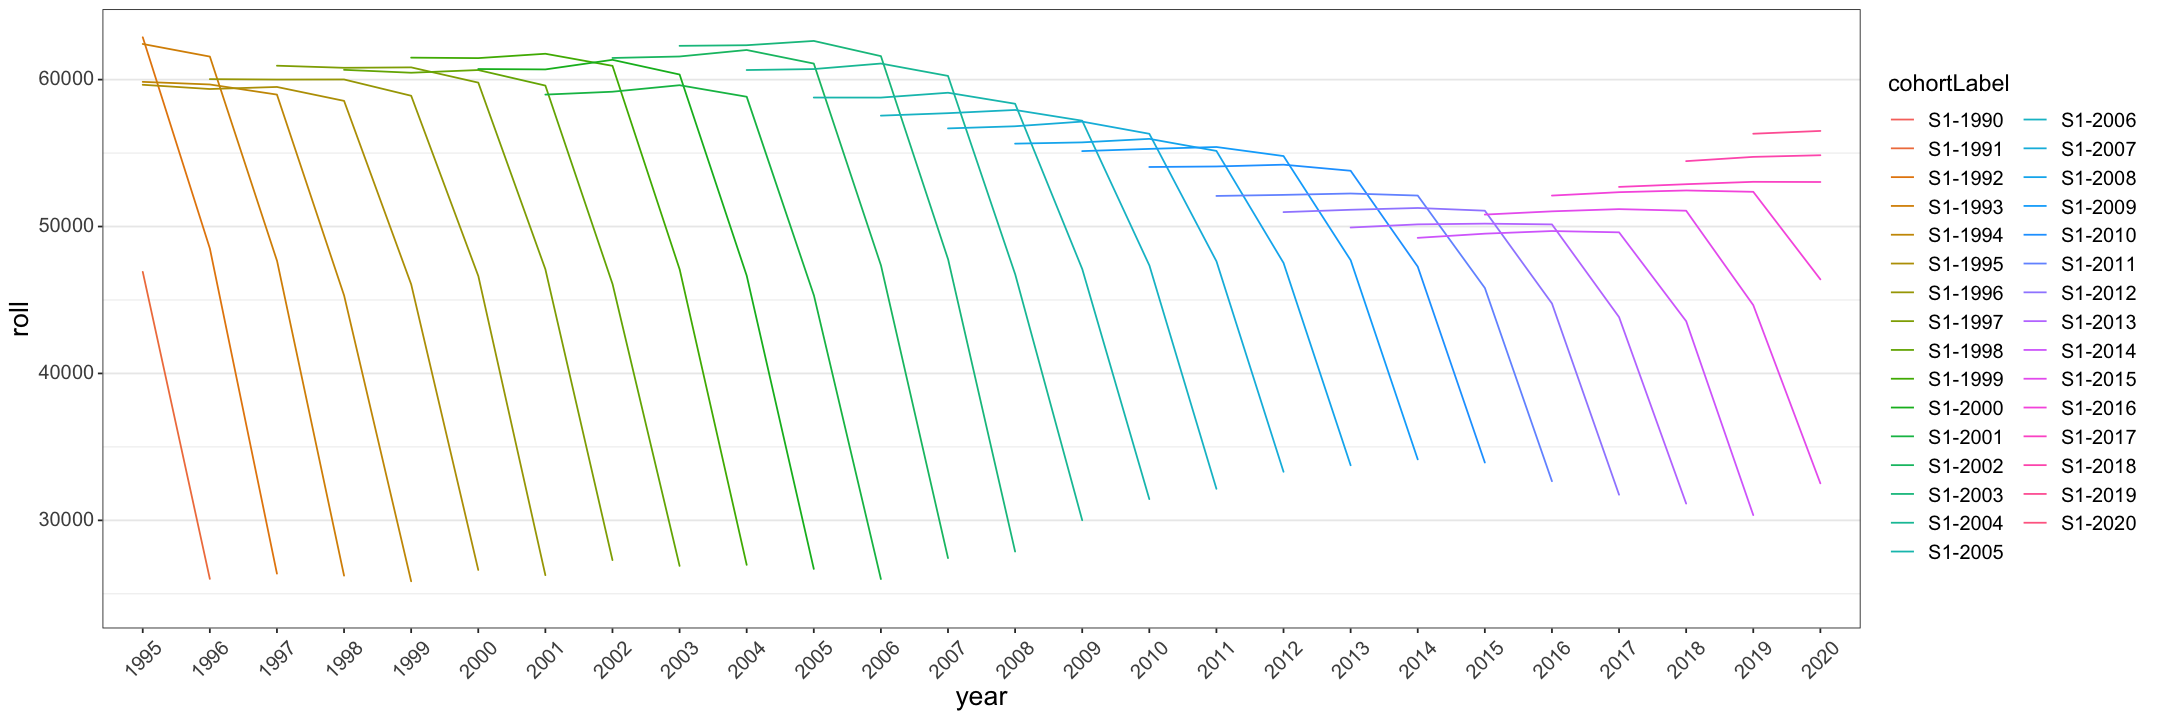

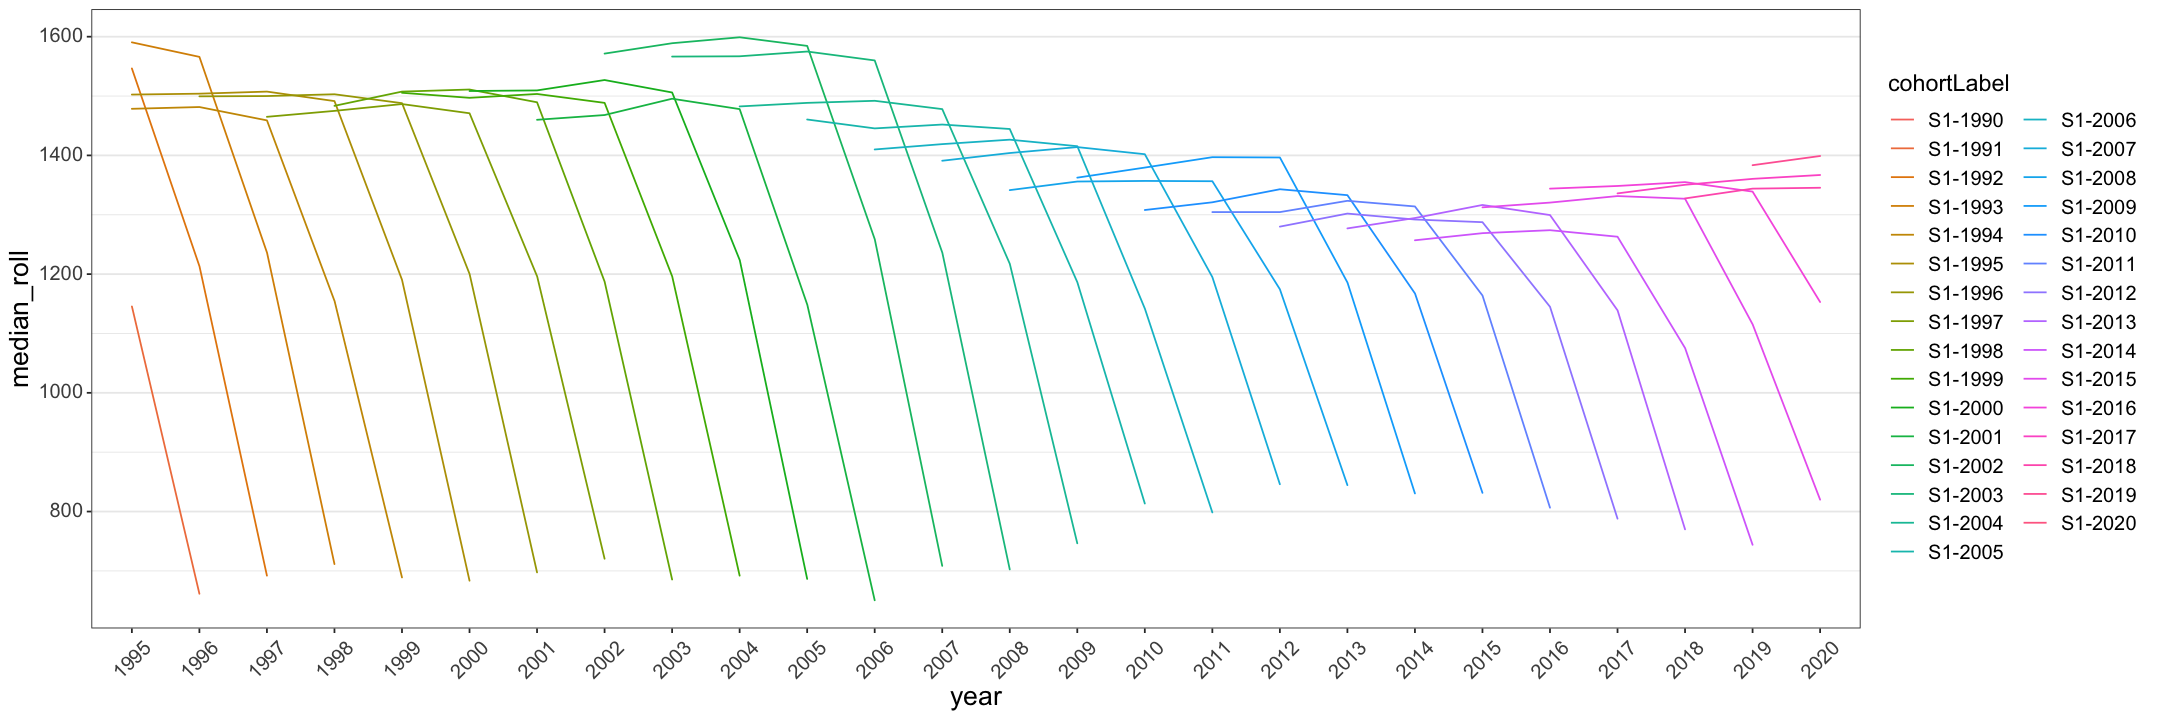

In [285]:

options(repr.plot.width = 18, repr.plot.height = 6)


tmp_df <- historical_census_pupils_by_la_and_level_1995_2020 %>%

    drop_na(cohort) %>%
    mutate(cohort = getCohort(level, as.integer(as.character(year)))) %>%
    mutate(cohortLabel = getCohortLabel(level, as.integer(as.character(year)))) %>%
    relocate(cohortLabel, .after = level) %>%
    relocate(cohort, .after = level) %>%

    group_by(year, level, cohort, cohortLabel) %>%
    summarise(median_roll = median(roll),
              roll = sum(roll)) #%>%
    #arrange(LocalAuthority, year, level, desc(cohort)) %>%
    #mutate(lead = lead(cohortLabel))

tmp_df %>%

    ggplot(aes(x = year, y = roll, group = cohortLabel, colour = cohortLabel)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        #expand_limits(y = 0) + 
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5))


tmp_df %>%

    ggplot(aes(x = year, y = median_roll, group = cohortLabel, colour = cohortLabel)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        #expand_limits(y = 0) + 
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5))


In [246]:
index_factors_by_local_authority_pupils <- historical_census_pupils_by_la_and_level_1995_2020 %>%

    left_join(historical_census_pupils_by_la_and_level_1995_2020 %>%
              
                  filter(year == base_year) %>%
                  mutate(base_year_census = roll) %>%
                  select(LocalAuthority, level, base_year_census)
              ) %>%

    mutate(index_factor = roll / base_year_census) 
    
index_factors_by_local_authority_pupils[c(8:16, 167:179), ]


Joining, by = c("LocalAuthority", "level")



LocalAuthority year level         cohort roll base_year_census index_factor
1  Aberdeen City  1996 S1            1996   2160 2160             1.0000000   
2  Aberdeen City  1996 S2            1995   2120 2120             1.0000000   
3  Aberdeen City  1996 S3            1994   2206 2206             1.0000000   
4  Aberdeen City  1996 S4            1993   2173 2173             1.0000000   
5  Aberdeen City  1996 S5            1992   1554 1554             1.0000000   
6  Aberdeen City  1996 S6            1991    847  847             1.0000000   
7  Aberdeen City  1996 special_units   NA     14   14             1.0000000   
8  Aberdeen City  1997 S1            1997   2246 2160             1.0398148   
9  Aberdeen City  1997 S2            1996   2131 2120             1.0051887   
10 Aberdeenshire  1995 S2            1994   2797 2930             0.9546075   
11 Aberdeenshire  1995 S3            1993   3001 2801             1.0714031   
12 Aberdeenshire  1995 S4            1992   3027 2983             1.0147503   
13 Aberdeenshire  1995 S5            1991   2329 2277             1.0228371   
14 Aberdeenshire  1995 S6            1990   1186 1320             0.8984848   
15 Aberdeenshire  1995 special_units   NA     44  103             0.4271845   
16 Aberdeenshire  1996 S1            1996   2817 2817             1.0000000   
17 Aberdeenshire  1996 S2            1995   2930 2930             1.0000000   
18 Aberdeenshire  1996 S3            1994   2801 2801             1.0000000   
19 Aberdeenshire  1996 S4            1993   2983 2983             1.0000000   
20 Aberdeenshire  1996 S5            1992   2277 2277             1.0000000   
21 Aberdeenshire  1996 S6            1991   1320 1320             1.0000000   
22 Aberdeenshire  1996 special_units   NA    103  103             1.0000000

median mean     min max  median_base_year_census mean_base_year_census
1 1237   1497.876 0   6209 NA                      NA

`summarise()` regrouping output by 'LocalAuthority' (override with `.groups` argument)



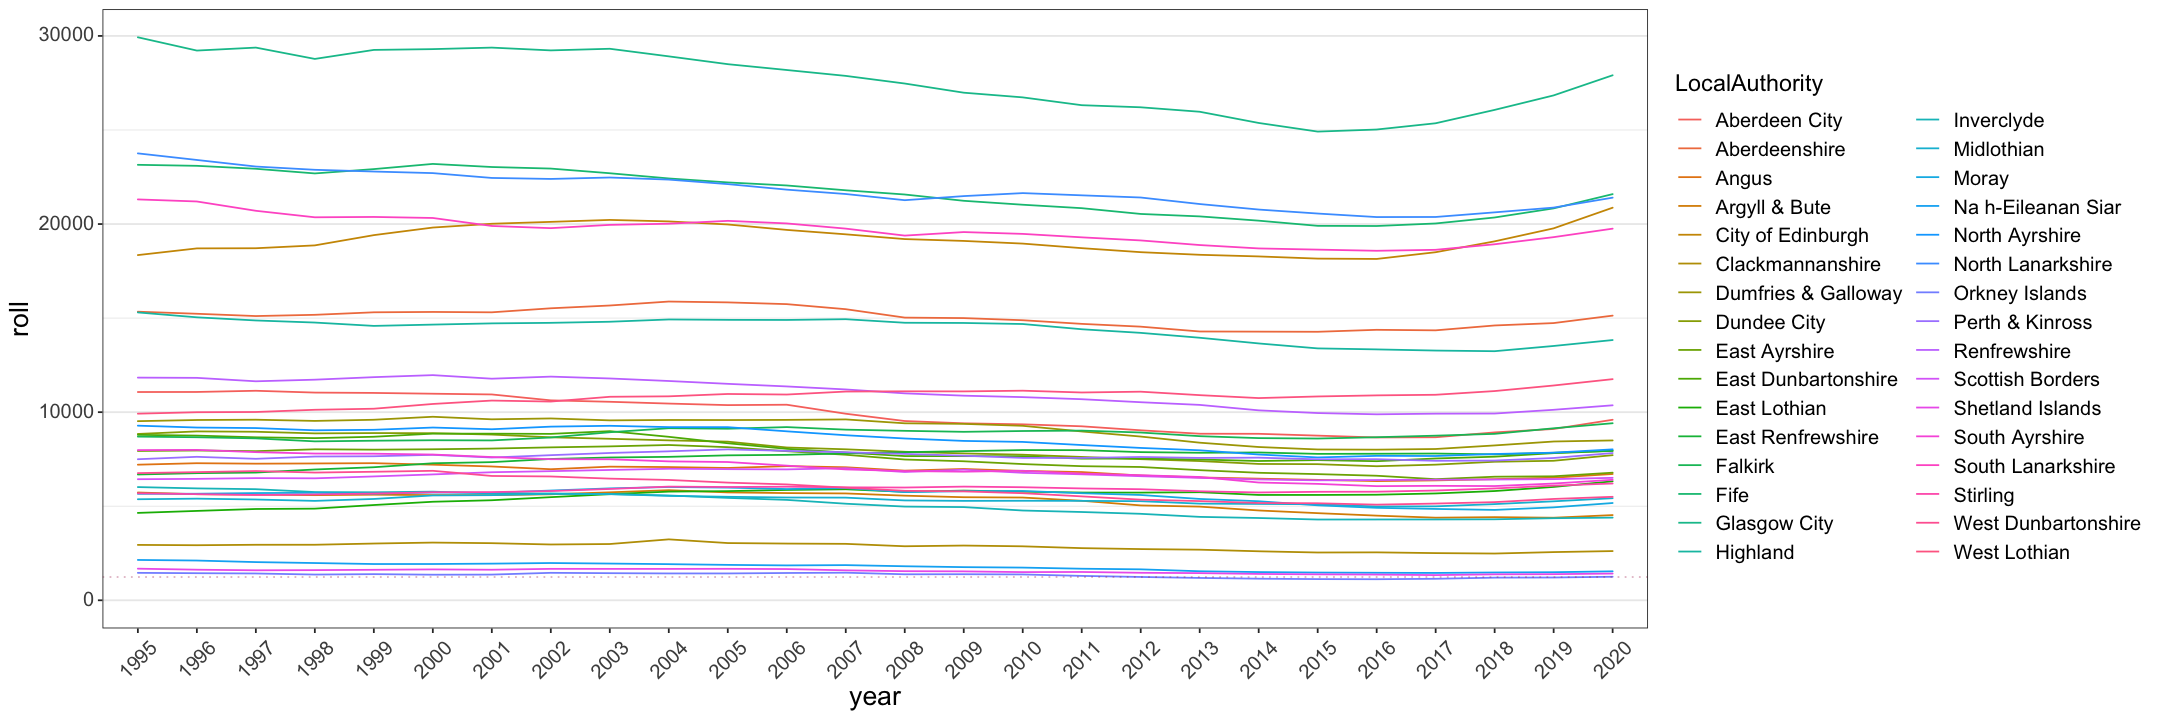

`summarise()` regrouping output by 'level' (override with `.groups` argument)



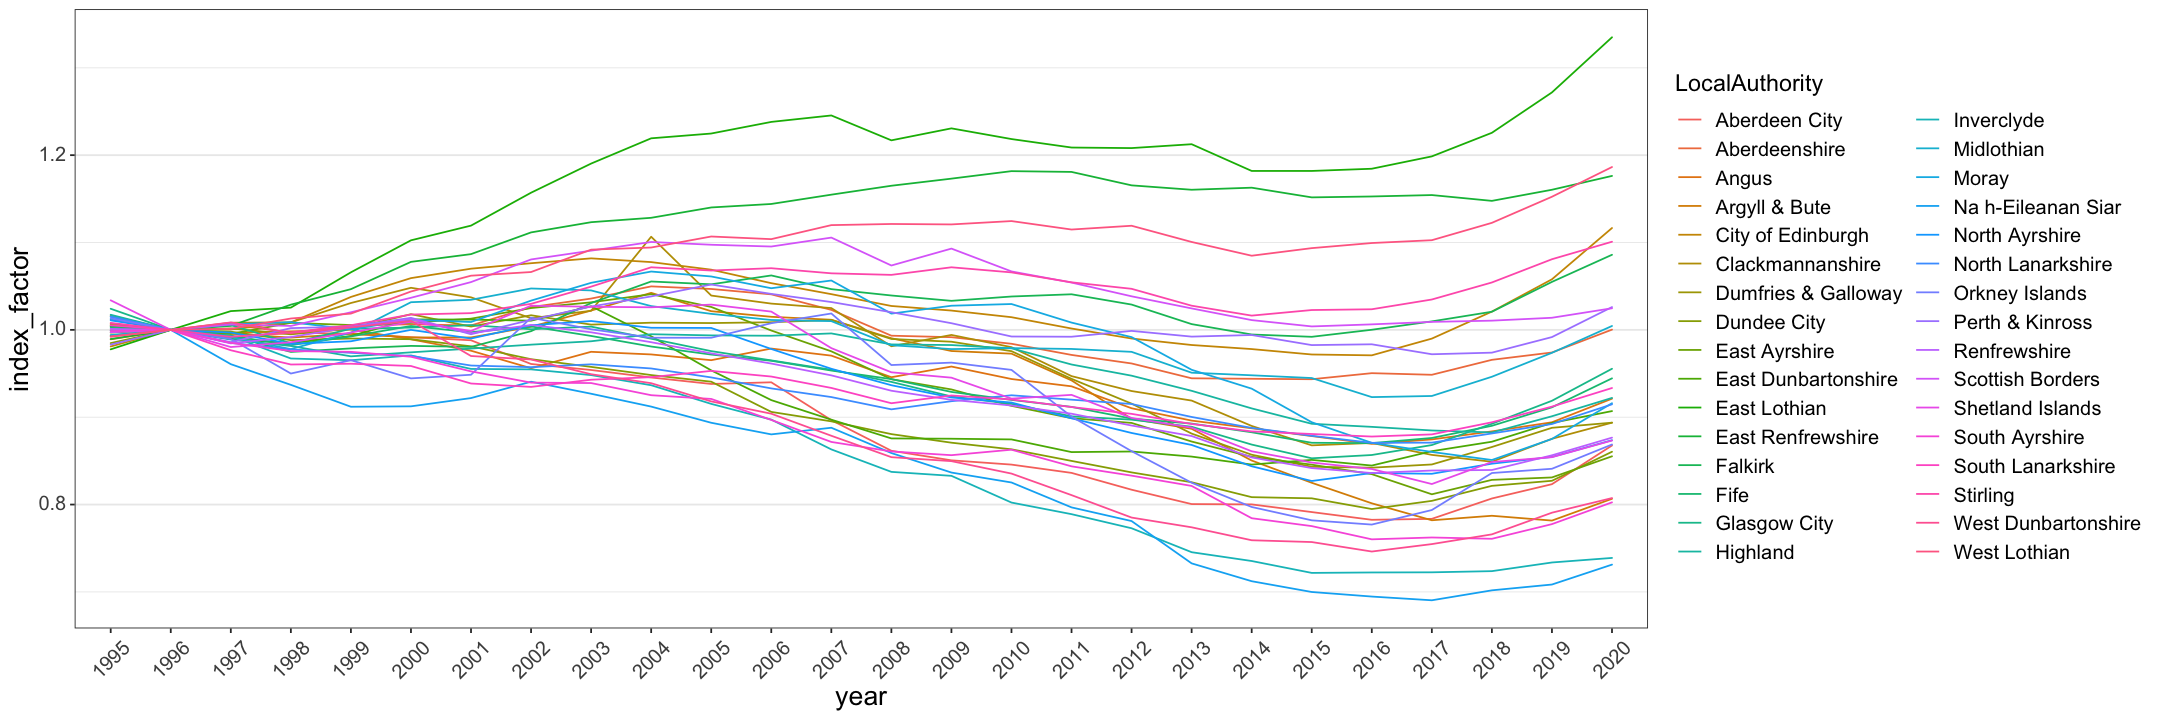

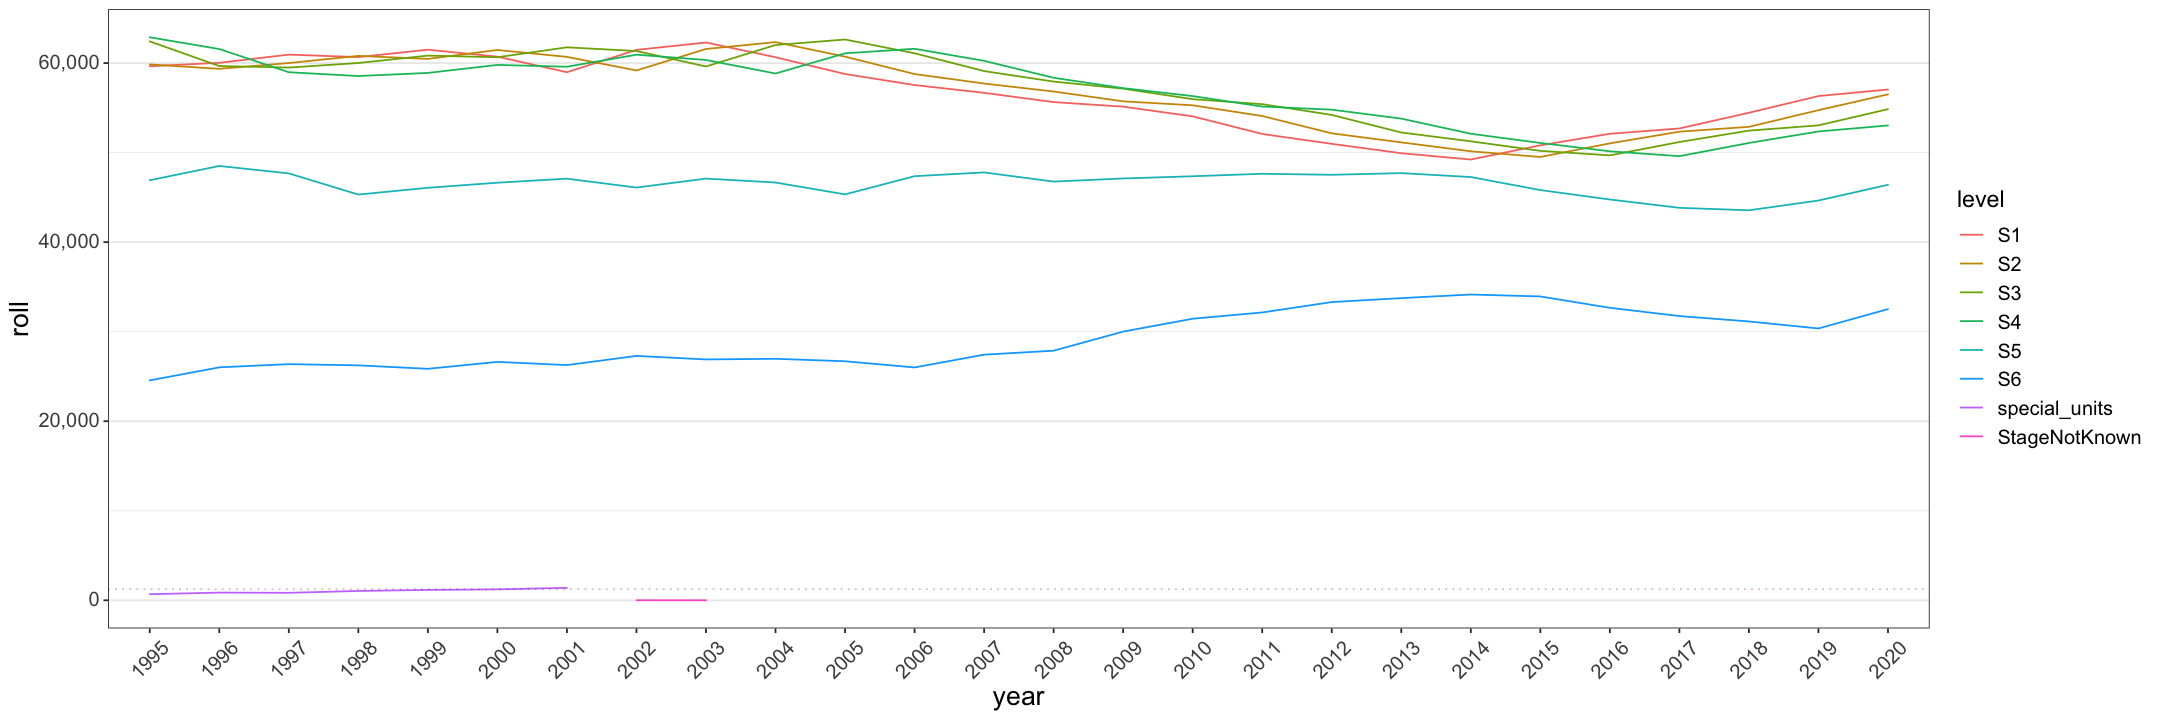

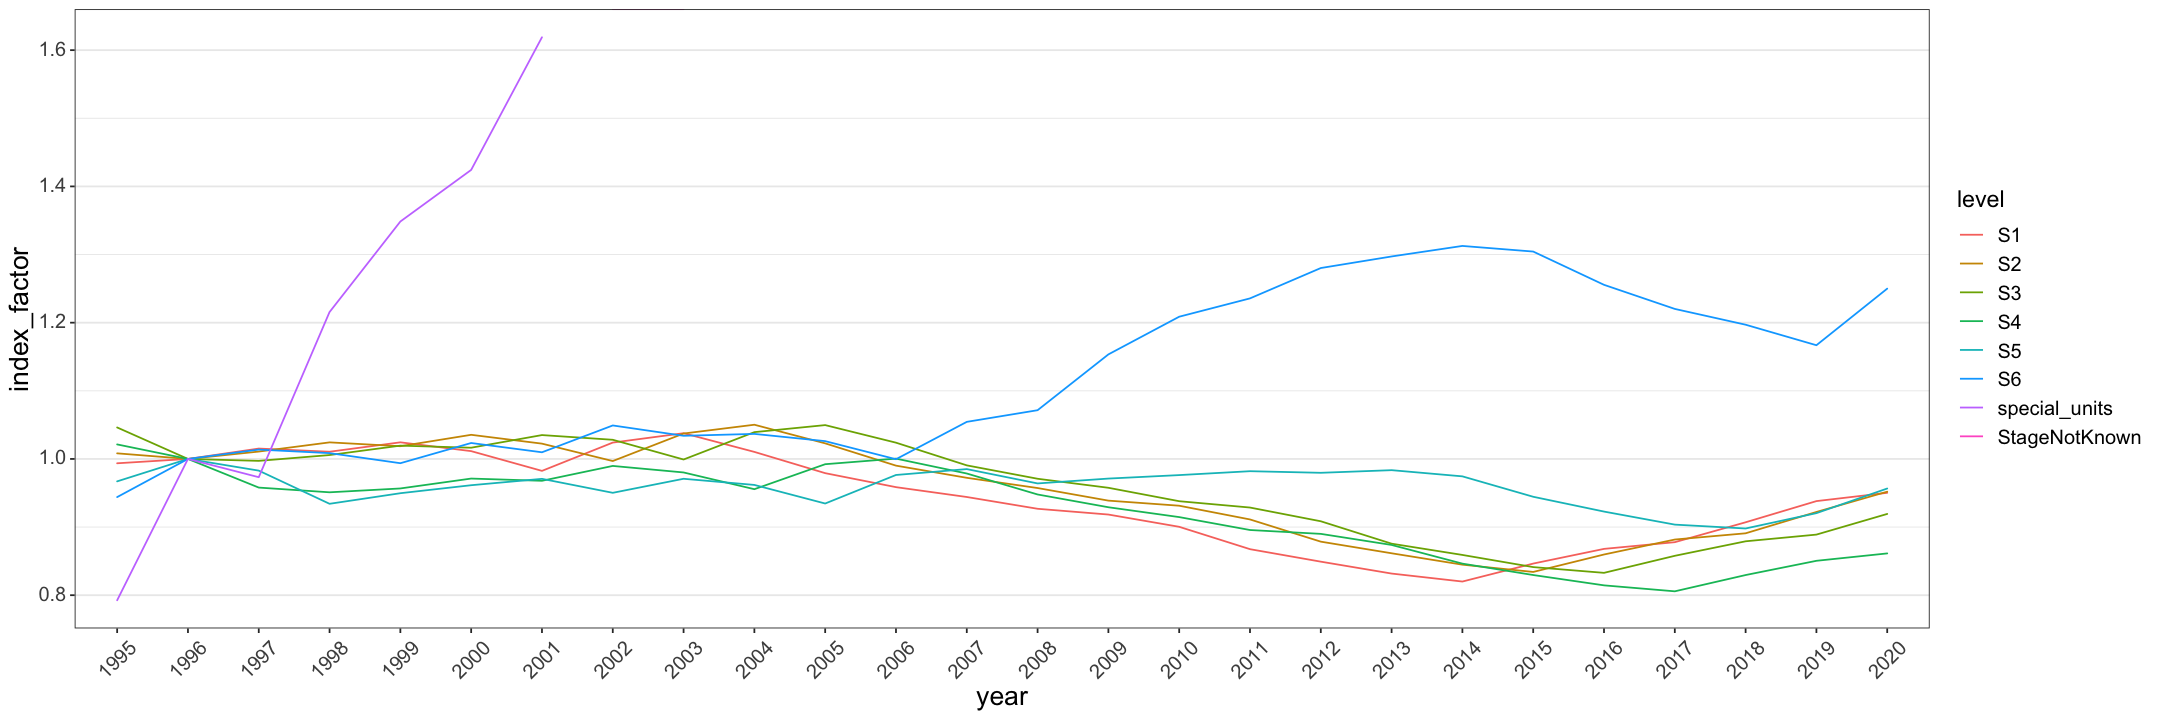

In [177]:
summary_lines <- index_factors_by_local_authority_pupils %>%
    summarise(
        median = median(roll, na.rm = TRUE),
        mean = mean(roll, na.rm = TRUE),
        min = min(roll, na.rm = TRUE),
        max = max(roll, na.rm = TRUE),
        median_base_year_census = median(base_year_census),
        mean_base_year_census = mean(base_year_census)
    )
summary_lines


options(repr.plot.width = 18, repr.plot.height = 6)

tmp_df <- index_factors_by_local_authority_pupils %>%

    group_by(LocalAuthority, year) %>%
        summarise(median_roll = median(roll, na.rm = TRUE),
                  median_base_year_census = median(base_year_census, na.rm = TRUE),
                  average_roll = mean(roll, na.rm = TRUE),
                  mean_base_year_census = mean(base_year_census, na.rm = TRUE),
                  roll = sum(roll, na.rm = TRUE),
                  base_year_census = sum(base_year_census, na.rm = TRUE)) %>%
        mutate(index_factor = roll / base_year_census,
               median_index_factor = median_roll / median_base_year_census)


tmp_df %>%

    ggplot(aes(x = year, y = roll, group = LocalAuthority, colour = LocalAuthority)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        geom_hline(aes(yintercept = summary_lines$median), colour = "maroon", alpha = 0.35, linetype = "dotted") +
        expand_limits(y = 0) + 
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5))

tmp_df %>%

    ggplot(aes(x = year, y = index_factor, group = LocalAuthority, colour = LocalAuthority)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5))


tmp_df <- index_factors_by_local_authority_pupils %>%

    group_by(level, year) %>%
        summarise(median_roll = median(roll, na.rm = TRUE),
                  median_base_year_census = median(base_year_census, na.rm = TRUE),
                  average_roll = mean(roll, na.rm = TRUE),
                  mean_base_year_census = mean(base_year_census, na.rm = TRUE),
                  roll = sum(roll, na.rm = TRUE),
                  base_year_census = sum(base_year_census, na.rm = TRUE)) %>%
        mutate(index_factor = roll / base_year_census,
               median_index_factor = median_roll / median_base_year_census)


tmp_df %>%

    ggplot(aes(x = year, y = roll, group = level, colour = level)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        geom_hline(aes(yintercept = summary_lines$median), colour = "maroon", alpha = 0.35, linetype = "dotted") +
        expand_limits(y = 0) + 
        
        scale_y_continuous(labels = scales::comma) + #stop auto-conversion to scientific mode
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5))

tmp_df %>%

    ggplot(aes(x = year, y = index_factor, group = level, colour = level)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5))


rm(tmp_df)

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Removed 16 rows containing non-finite values (stat_density).”
Warning message:
“Removed 16 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 26 rows containing missing values (geom_hline).”


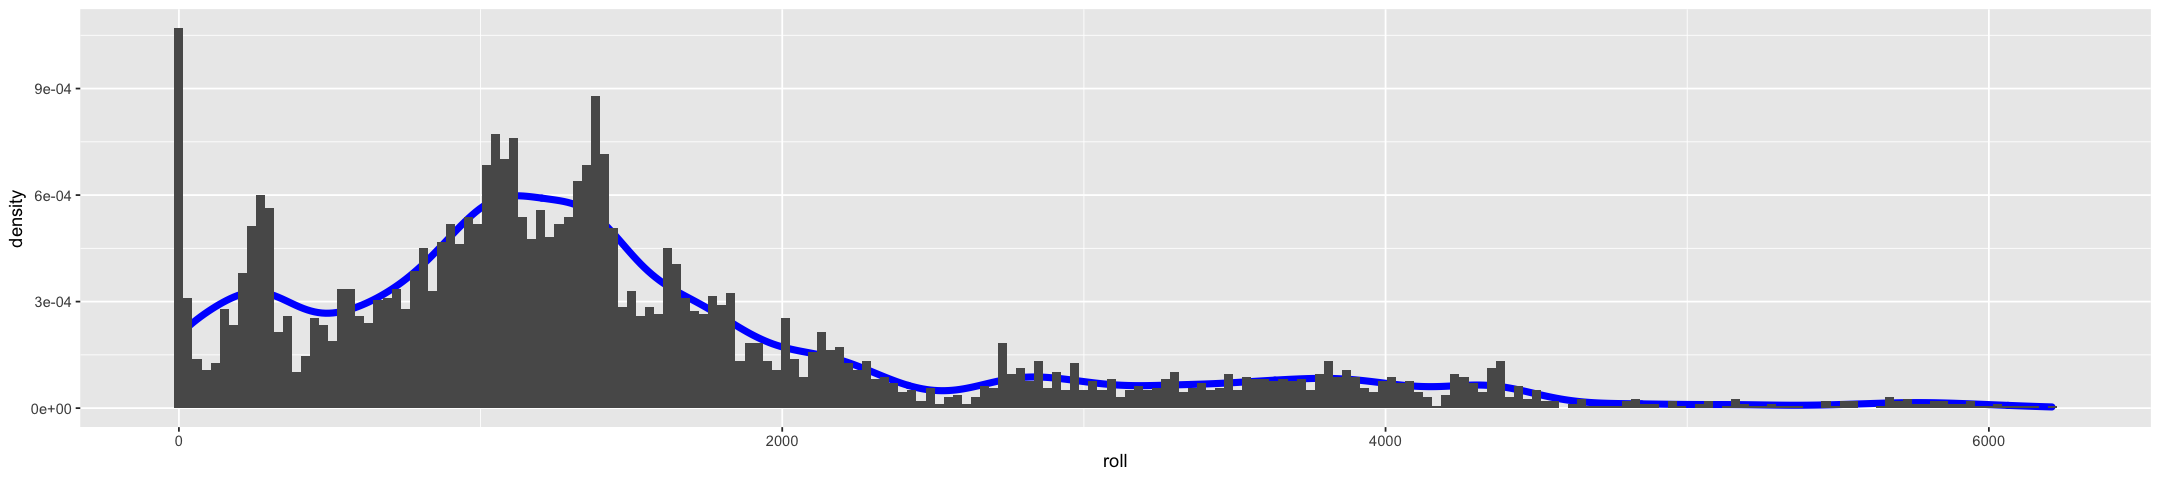

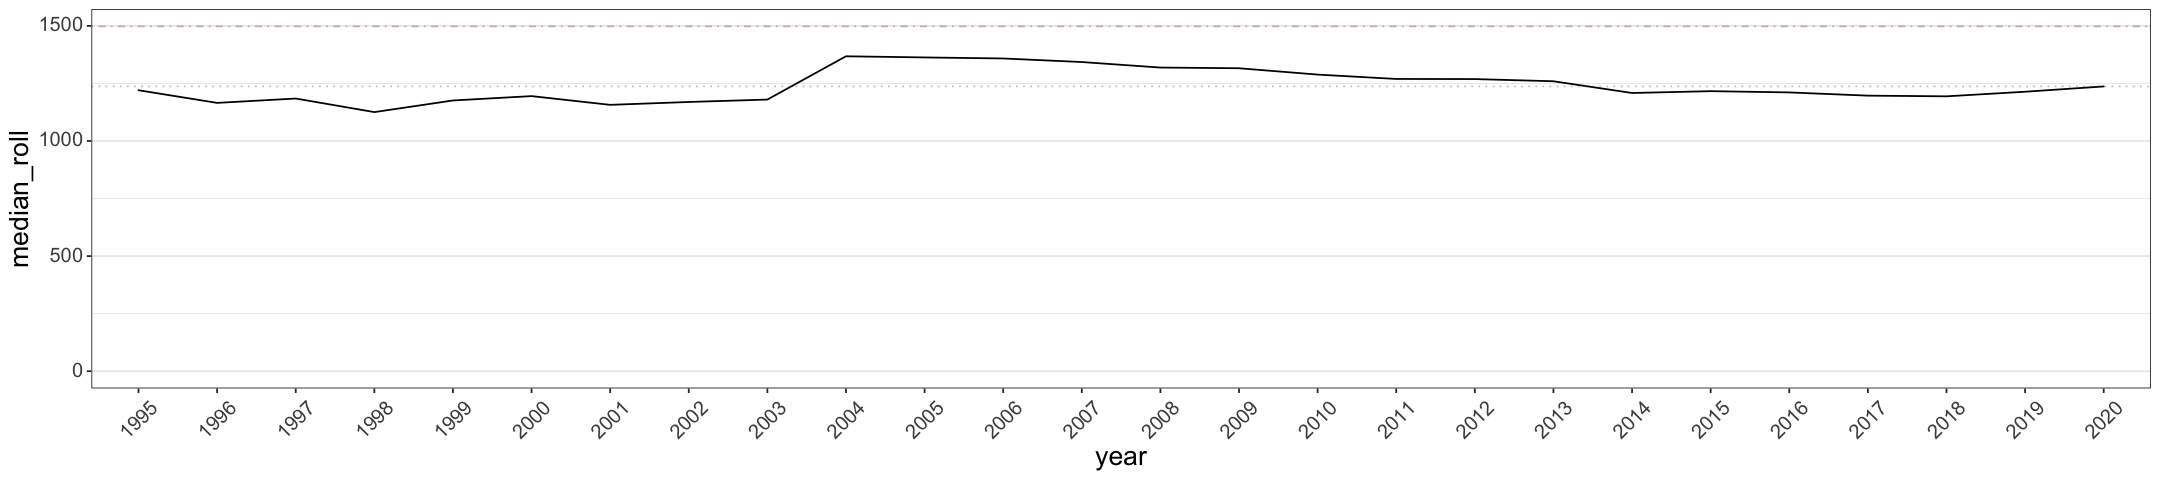

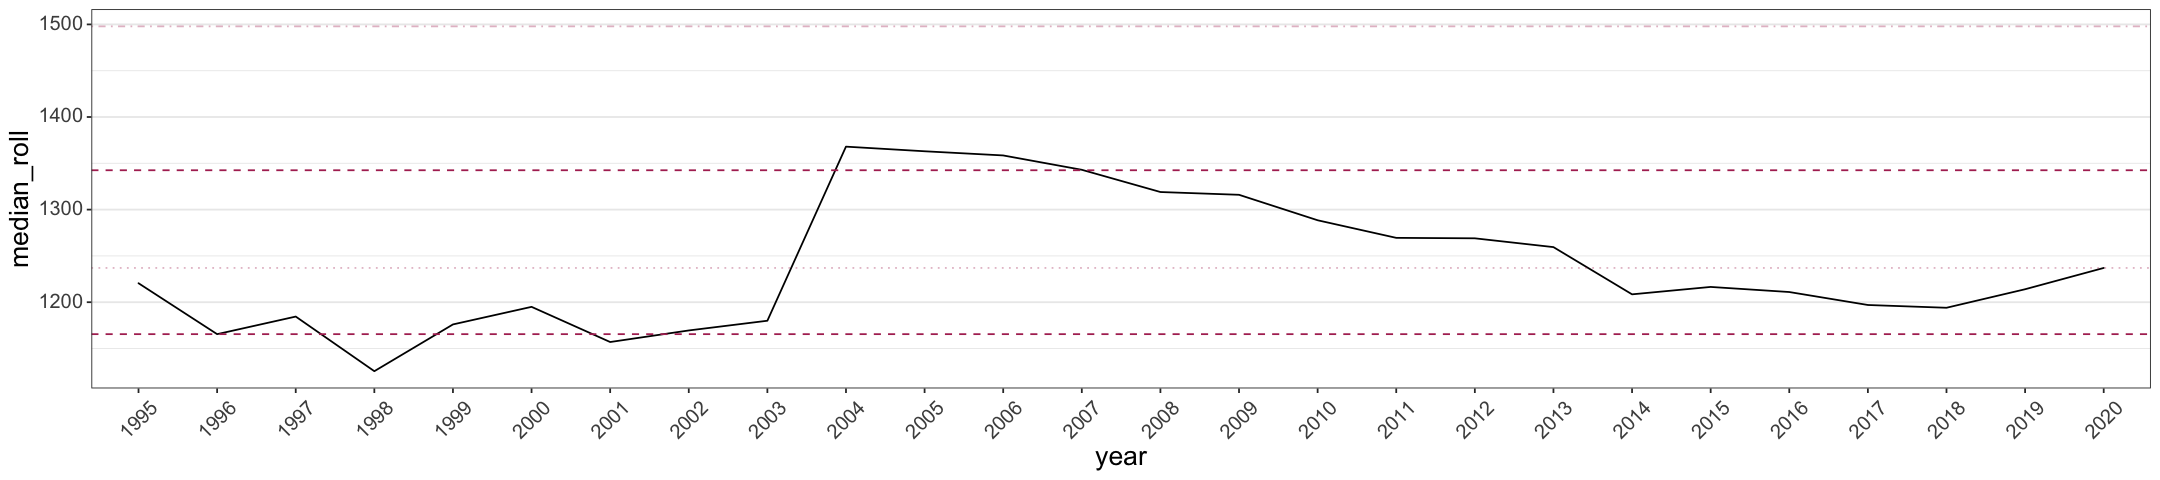

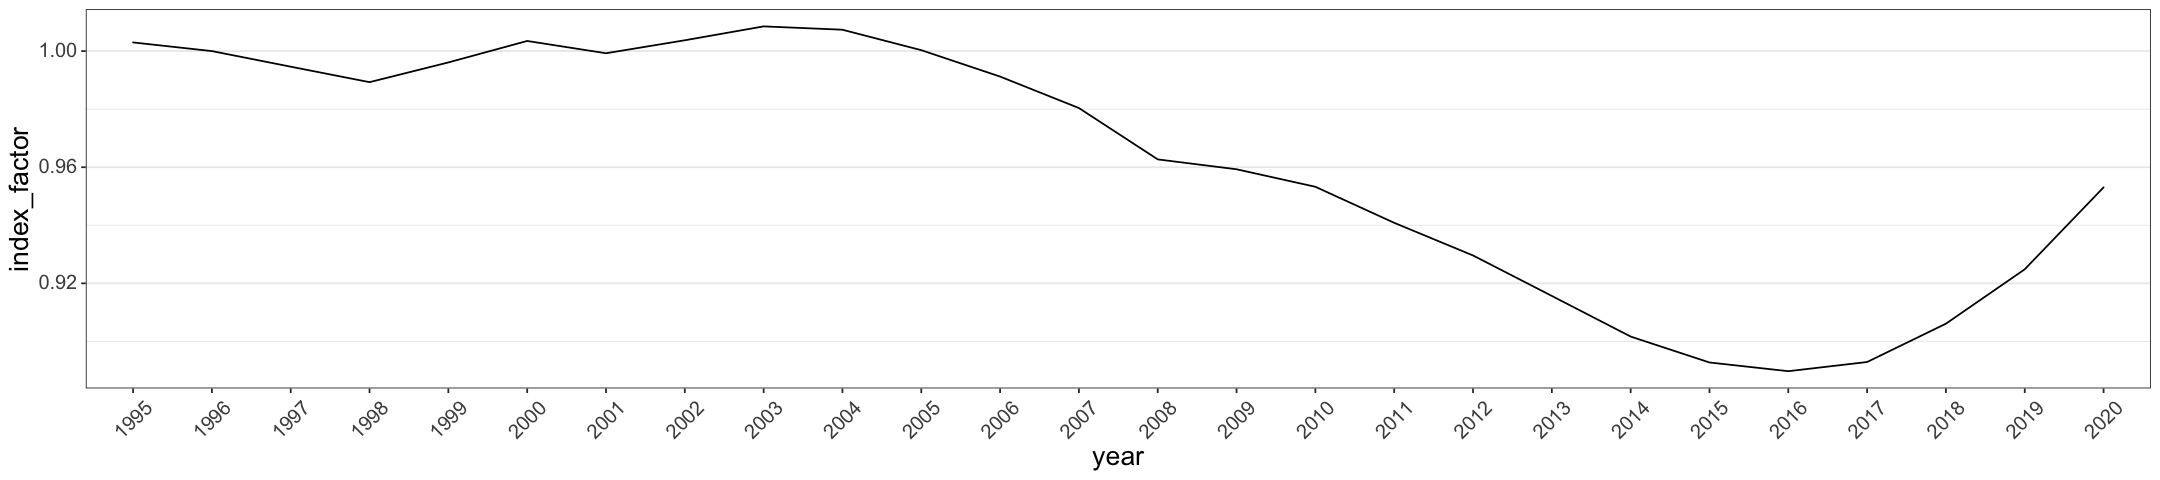

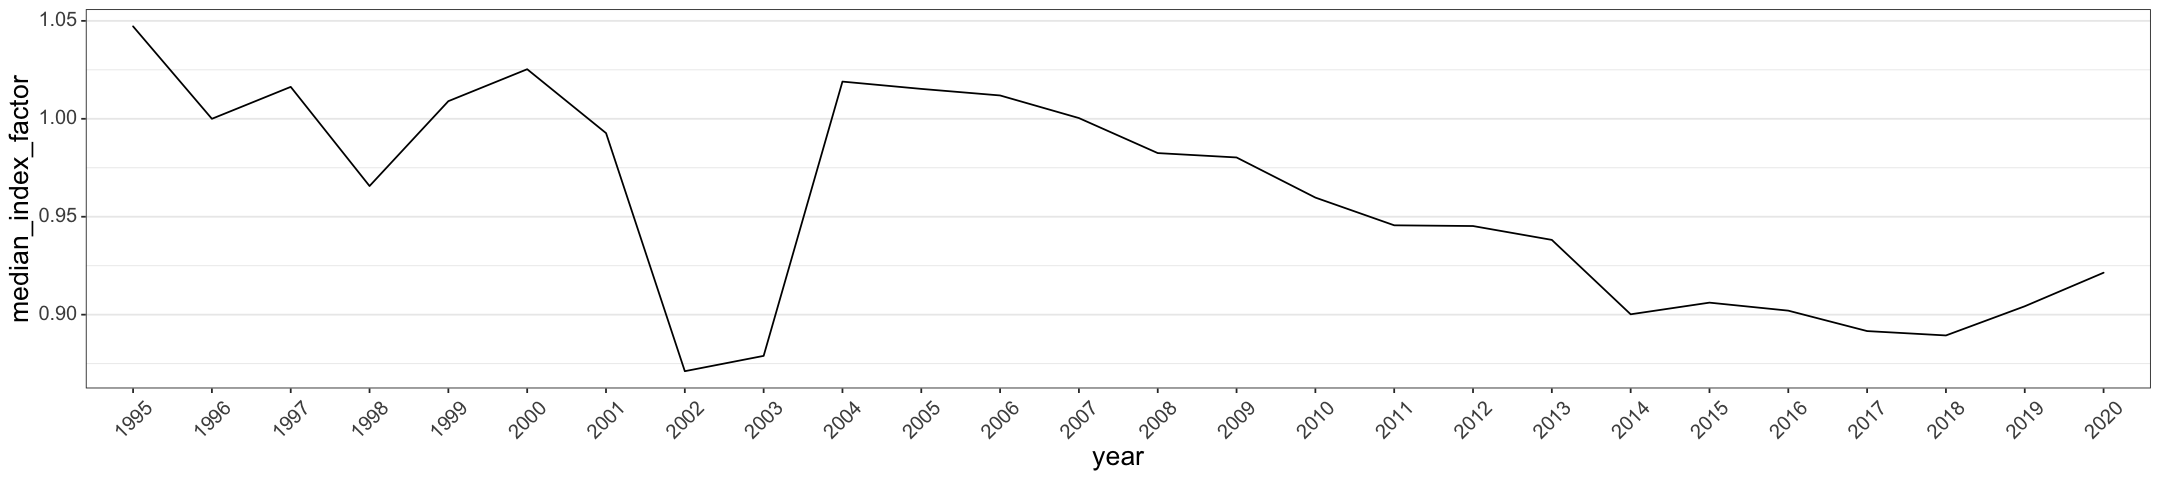

In [178]:

options(repr.plot.width = 18, repr.plot.height = 4)
tmp_df <- index_factors_by_local_authority_pupils %>%

    group_by(year) %>%
        summarise(median_roll = median(roll, na.rm = TRUE),
                  median_base_year_census = median(base_year_census, na.rm = TRUE),
                  average_roll = mean(roll, na.rm = TRUE),
                  mean_base_year_census = mean(base_year_census, na.rm = TRUE),
                  roll = sum(roll, na.rm = TRUE),
                  base_year_census = sum(base_year_census, na.rm = TRUE)) %>%
        mutate(index_factor = roll / base_year_census,
               median_index_factor = median_roll / median_base_year_census)

index_factors_by_local_authority_pupils %>%
    
    ggplot(aes(roll)) +
        geom_density(colour = "blue", size = 2) +
        geom_histogram(aes(y = stat(density)), binwidth = 30)


tmp_df %>%

    ggplot(aes(x = year, y = median_roll, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        geom_hline(aes(yintercept = summary_lines$median_base_year_census), colour = "maroon", linetype = "dashed") +
        geom_hline(aes(yintercept = summary_lines$median), colour = "maroon", alpha = 0.35, linetype = "dotted") +
        geom_hline(aes(yintercept = summary_lines$mean), colour = "maroon", alpha = 0.35, linetype = "dotdash") +
        expand_limits(y = 0) + 
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5))


tmp_df %>%

    ggplot(aes(x = year, y = median_roll, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        geom_hline(aes(yintercept = median_base_year_census), colour = "maroon", linetype = "dashed") +
        geom_hline(aes(yintercept = summary_lines$median), colour = "maroon", alpha = 0.35, linetype = "dotted") +
        geom_hline(aes(yintercept = summary_lines$mean), colour = "maroon", alpha = 0.35, linetype = "dotdash") +
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 



tmp_df %>%

    ggplot(aes(x = year, y = index_factor, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') +
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 

tmp_df %>%

    ggplot(aes(x = year, y = median_index_factor, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') +
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 


#head(tmp_df)
write_csv(tmp_df, "base/index_factors_by_local_authority_pupils-summaries_1995_2020.csv")
rm(tmp_df)

#### Techers ...

In [63]:
historical_census_teachers_by_la_1995_2020 <- read_csv("sta_it_402/data/demographic_data/teacher_la_census_1995-2020.csv", trim_ws = T) %>% #, skip_empty_rows = T) # NOT skipping empty rows... :(
                    filter(rowSums(is.na(.)) != ncol(.))

glimpse(historical_census_teachers_by_la_1995_2020)
head(historical_census_teachers_by_la_1995_2020)



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_number(),
  LocalAuthority = col_character()
)
ℹ Use `spec()` for the full column specifications.




Rows: 32
Columns: 27
$ LocalAuthority <chr> "Aberdeen City", "Aberdeenshire", "Angus", "Argyll & B…
$ `1995`         <dbl> 855, 1100, 565, 456, 1430, 221, 799, 750, 613, 628, 35…
$ `1996`         <dbl> 861, 1102, 562, 456, 1399, 219, 755, 733, 591, 628, 35…
$ `1997`         <dbl> 861, 1110, 568, 446, 1388, 220, 792, 687, 586, 615, 35…
$ `1998`         <dbl> 868, 1136, 573, 444, 1428, 228, 817, 714, 582, 619, 36…
$ `1999`         <dbl> 875, 1168, 576, 441, 1498, 233, 808, 728, 587, 629, 39…
$ `2000`         <dbl> 893, 1137, 577, 448, 1554, 237, 784, 739, 591, 627, 40…
$ `2001`         <dbl> 882, 1157, 572, 448, 1543, 238, 792, 723, 593, 630, 41…
$ `2002`         <dbl> 883, 1247, 579, 455, 1600, 236, 804, 768, 605, 640, 44…
$ `2003`         <dbl> 896, 1245, 576, 442, 1551, 224, 793, 727, 620, 648, 44…
$ `2004`         <dbl> 879, 1243, 559, 450, 1559, 224, 788, 751, 610, 659, 44…
$ `2005`         <dbl> 871, 1286, 597, 478, 1602, 235, 808, 720, 624, 691, 47…
$ `2006`         <dbl> 906, 129

LocalAuthority    1995 1996 1997 1998 1999 2000 2001 2002 2003 ⋯ 2011 2012
1 Aberdeen City      855  861  861  868  875  893  882  883  896 ⋯  744  741
2 Aberdeenshire     1100 1102 1110 1136 1168 1137 1157 1247 1245 ⋯ 1258 1222
3 Angus              565  562  568  573  576  577  572  579  576 ⋯  581  570
4 Argyll & Bute      456  456  446  444  441  448  448  455  442 ⋯  432  439
5 City of Edinburgh 1430 1399 1388 1428 1498 1554 1543 1600 1551 ⋯ 1487 1488
6 Clackmannanshire   221  219  220  228  233  237  238  236  224 ⋯  221  221
  2013 2014 2015 2016 2017 2018 2019 2020
1  740  745  735  712  714  716  722  751
2 1209 1205 1217 1192 1199 1206 1212 1234
3  570  555  548  545  547  555  560  575
4  434  438  425  423  401  419  402  406
5 1483 1429 1418 1408 1437 1462 1535 1594
6  228  229  214  226  218  211  221  233

In [64]:
historical_census_teachers_by_la_1995_2020 <- historical_census_teachers_by_la_1995_2020 %>%

    mutate_at(vars(LocalAuthority), as.factor) %>%
    
    mutate_at(vars(matches(regex("\\b\\d{4}\\b"))), as.character) %>%
    mutate_at(vars(matches(regex("\\b\\d{4}\\b"))), parse_number) %>%
    mutate_at(vars(matches(regex("\\b\\d{4}\\b"))), as.integer) %>%

    pivot_longer(matches(regex("\\b\\d{4}\\b")), names_to = "year", values_to = "teacher_count") %>% 
    mutate_at(c("year"), as.ordered)

glimpse(historical_census_teachers_by_la_1995_2020)

Rows: 832
Columns: 3
$ LocalAuthority <fct> Aberdeen City, Aberdeen City, Aberdeen City, Aberdeen …
$ year           <ord> 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, …
$ teacher_count  <int> 855, 861, 861, 868, 875, 893, 882, 883, 896, 879, 871,…


In [78]:
index_factors_by_local_authority_teachers <- historical_census_teachers_by_la_1995_2020 %>%

    left_join(historical_census_teachers_by_la_1995_2020 %>%
              
                  filter(year == base_year) %>%
                  mutate(base_year_census = teacher_count) %>%
                  select(LocalAuthority, base_year_census)
              ) %>%

    mutate(index_factor = teacher_count / base_year_census)
    
index_factors_by_local_authority_teachers[c(1:6, 27:34), ]


Joining, by = "LocalAuthority"



LocalAuthority year teacher_count base_year_census index_factor
1  Aberdeen City  1995  855           861             0.9930314   
2  Aberdeen City  1996  861           861             1.0000000   
3  Aberdeen City  1997  861           861             1.0000000   
4  Aberdeen City  1998  868           861             1.0081301   
5  Aberdeen City  1999  875           861             1.0162602   
6  Aberdeen City  2000  893           861             1.0371661   
7  Aberdeenshire  1995 1100          1102             0.9981851   
8  Aberdeenshire  1996 1102          1102             1.0000000   
9  Aberdeenshire  1997 1110          1102             1.0072595   
10 Aberdeenshire  1998 1136          1102             1.0308530   
11 Aberdeenshire  1999 1168          1102             1.0598911   
12 Aberdeenshire  2000 1137          1102             1.0317604   
13 Aberdeenshire  2001 1157          1102             1.0499093   
14 Aberdeenshire  2002 1247          1102             1.1315789

median mean    min max  median_base_year_census mean_base_year_census
1 617.5  762.274 125 2431 600                     756.8125

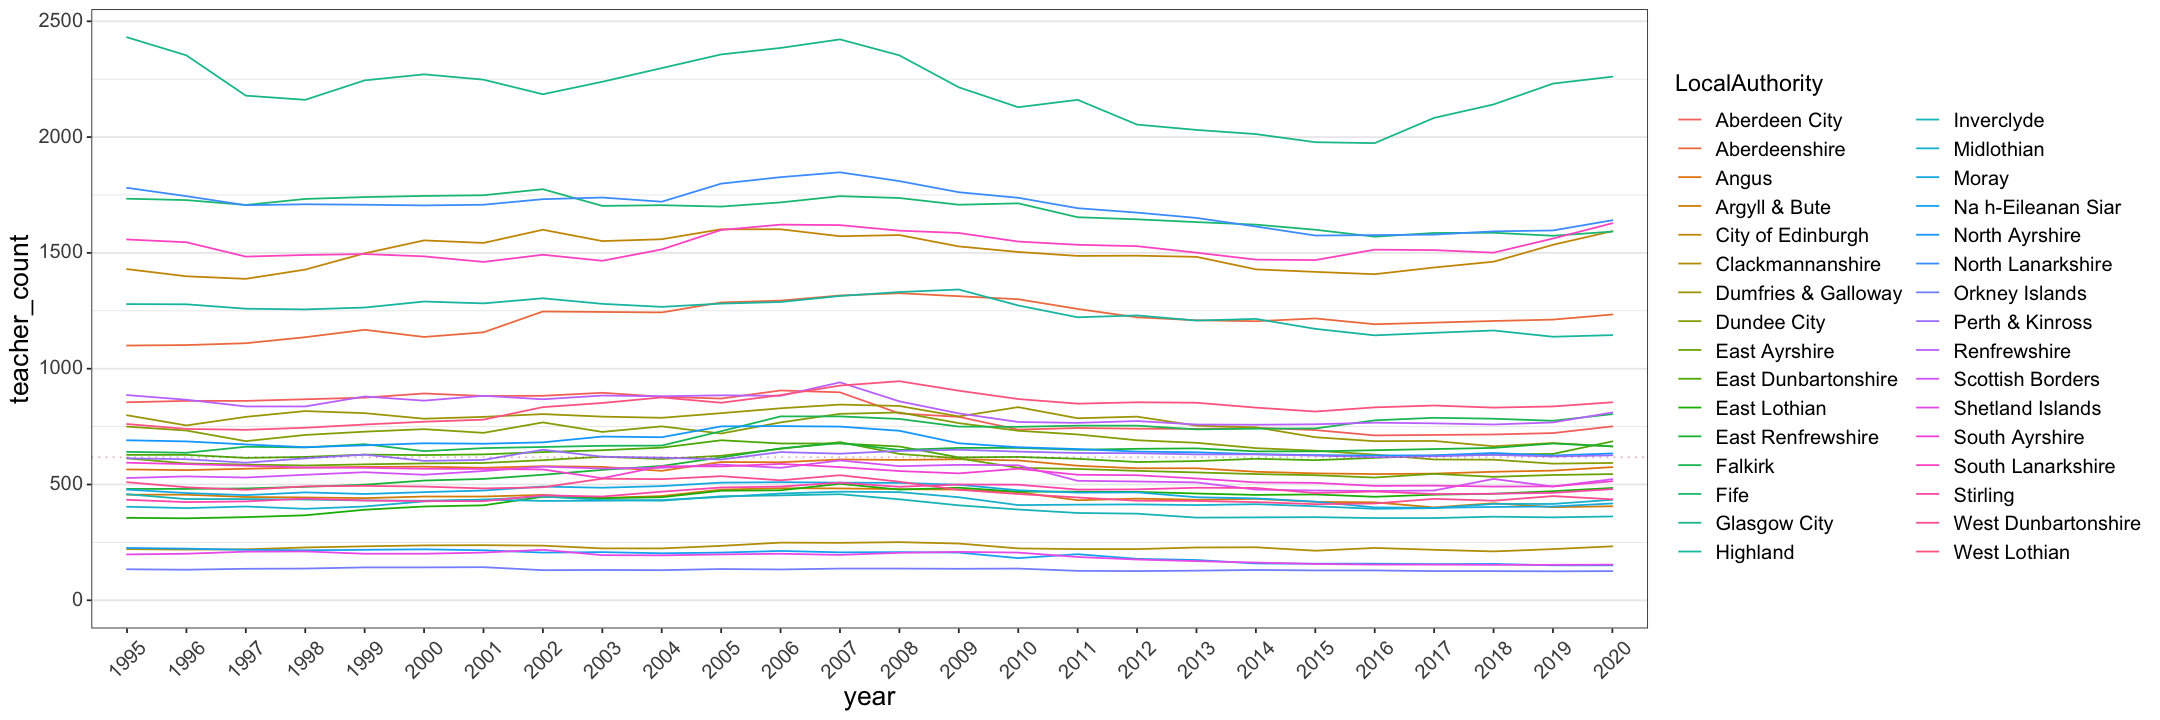

`summarise()` ungrouping output (override with `.groups` argument)



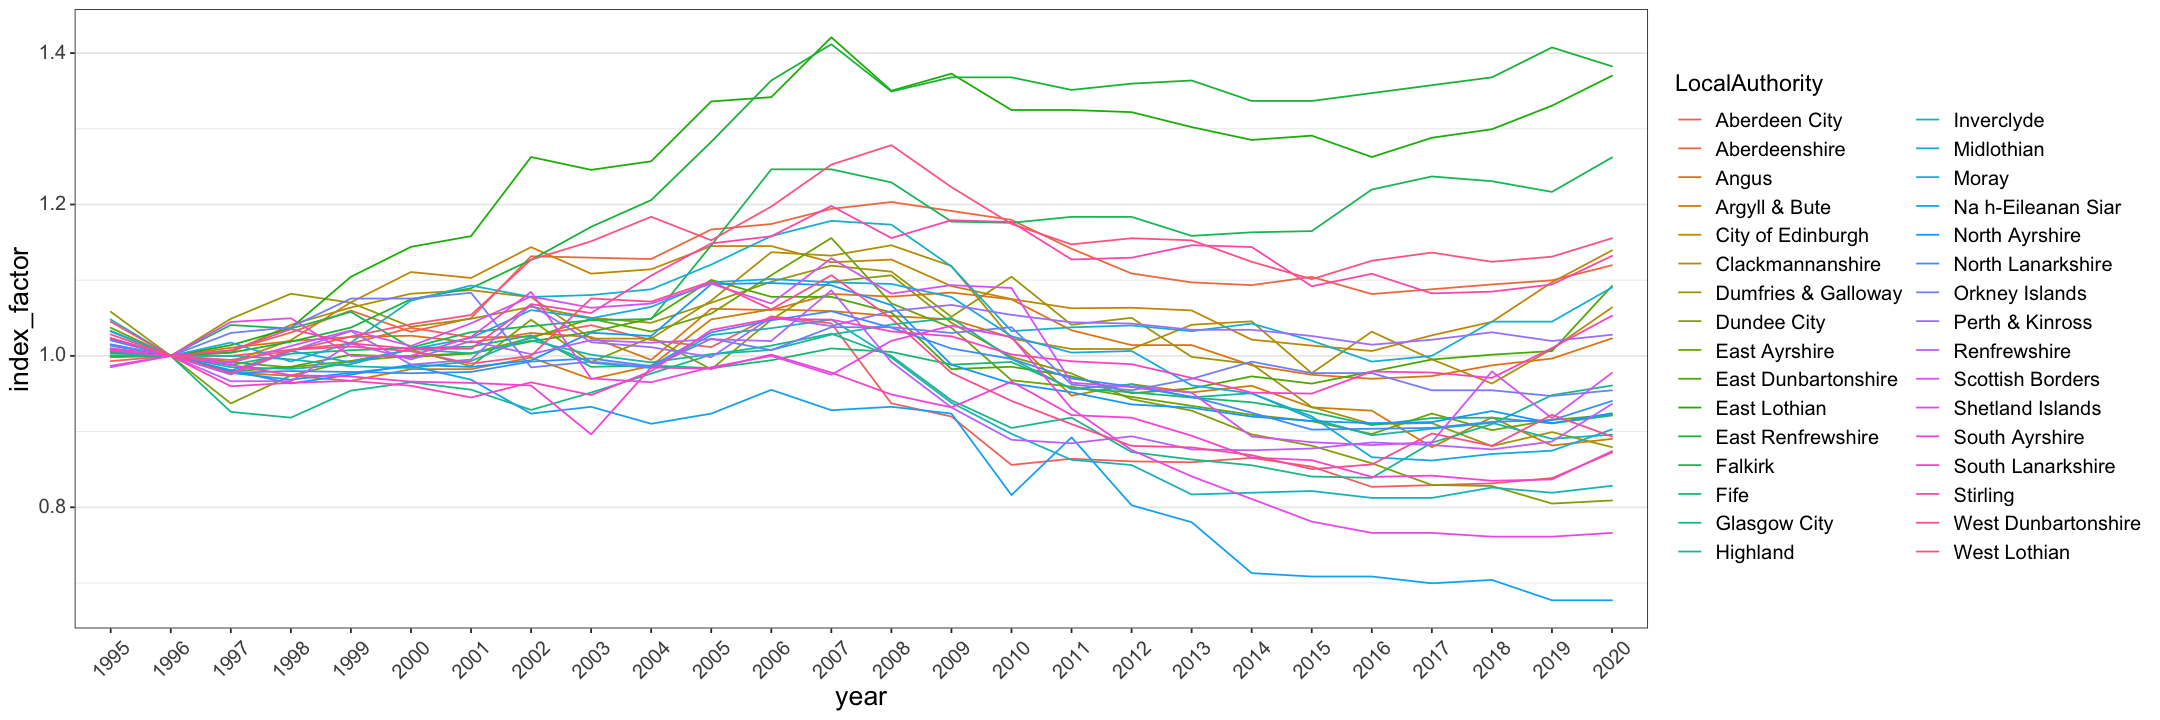

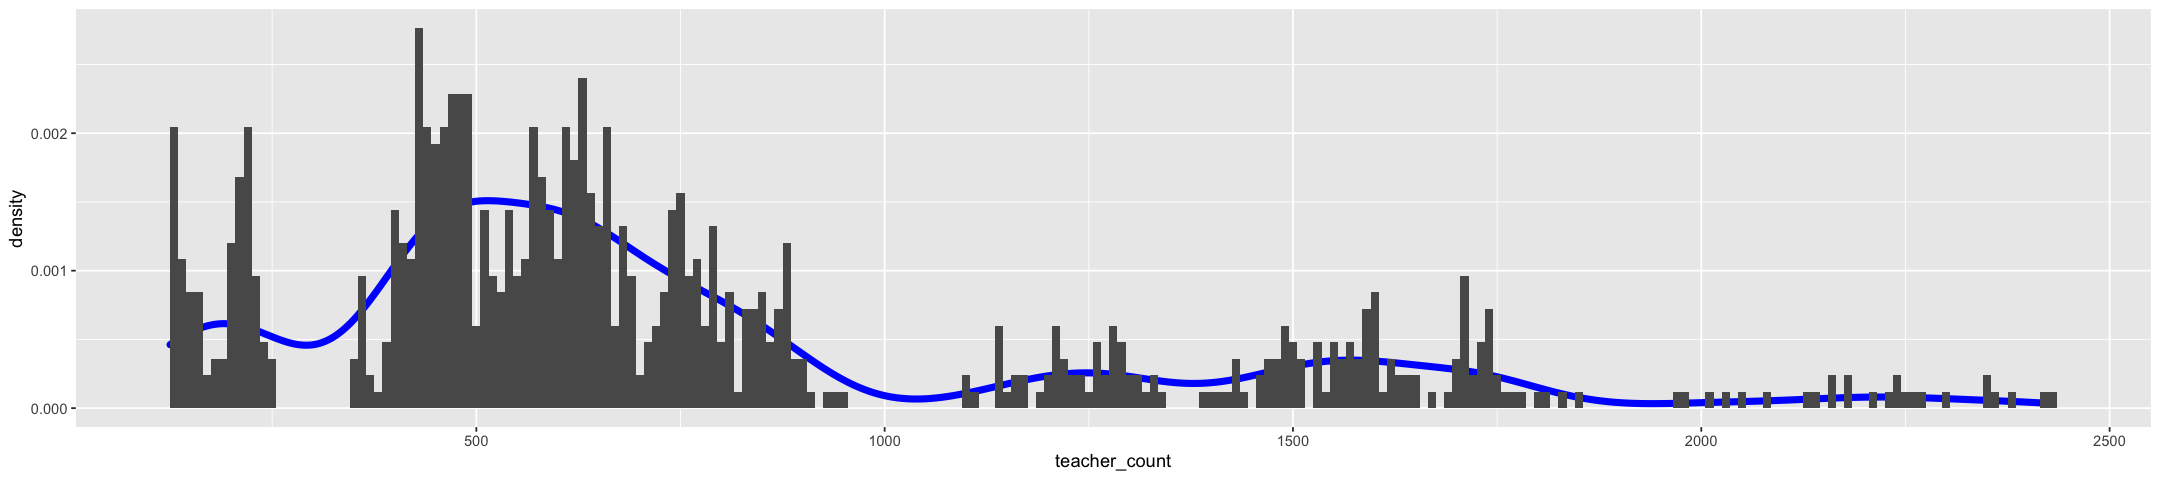

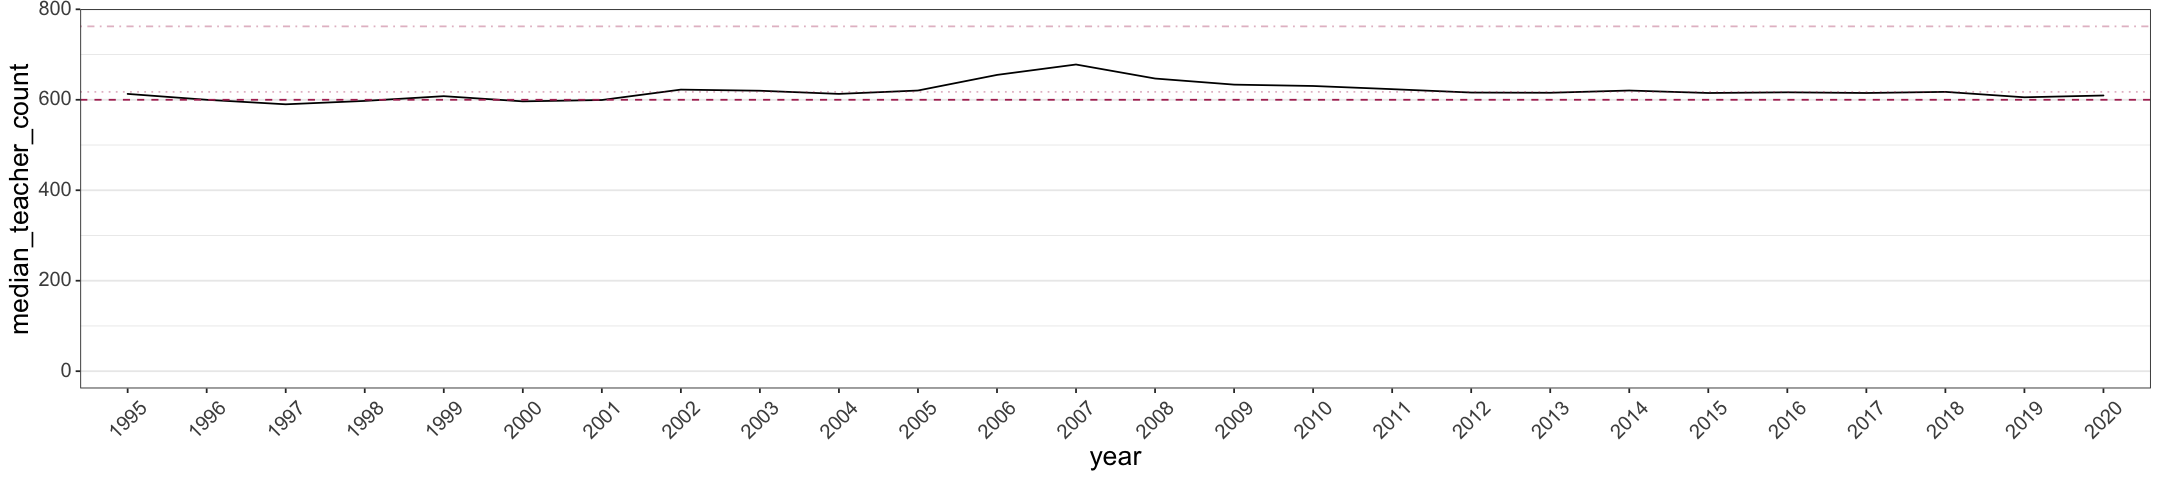

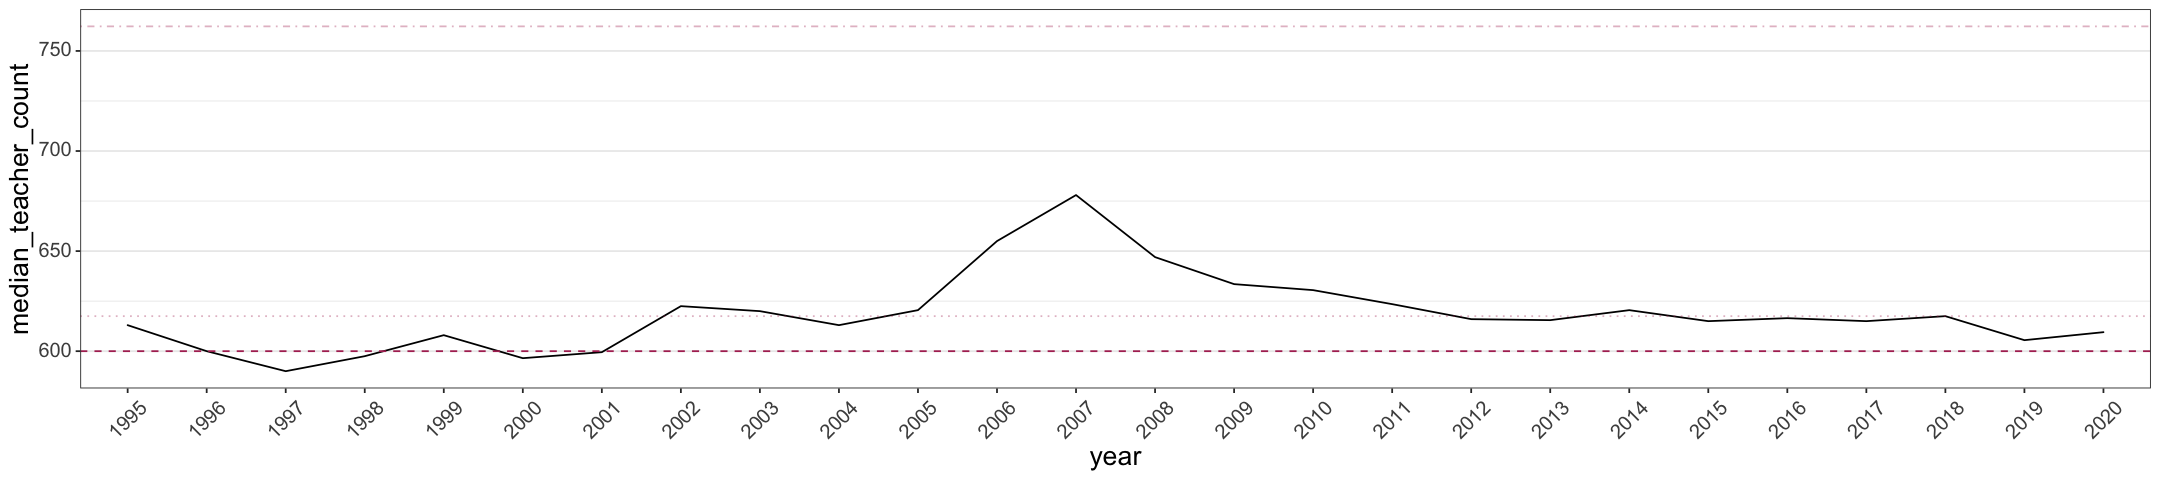

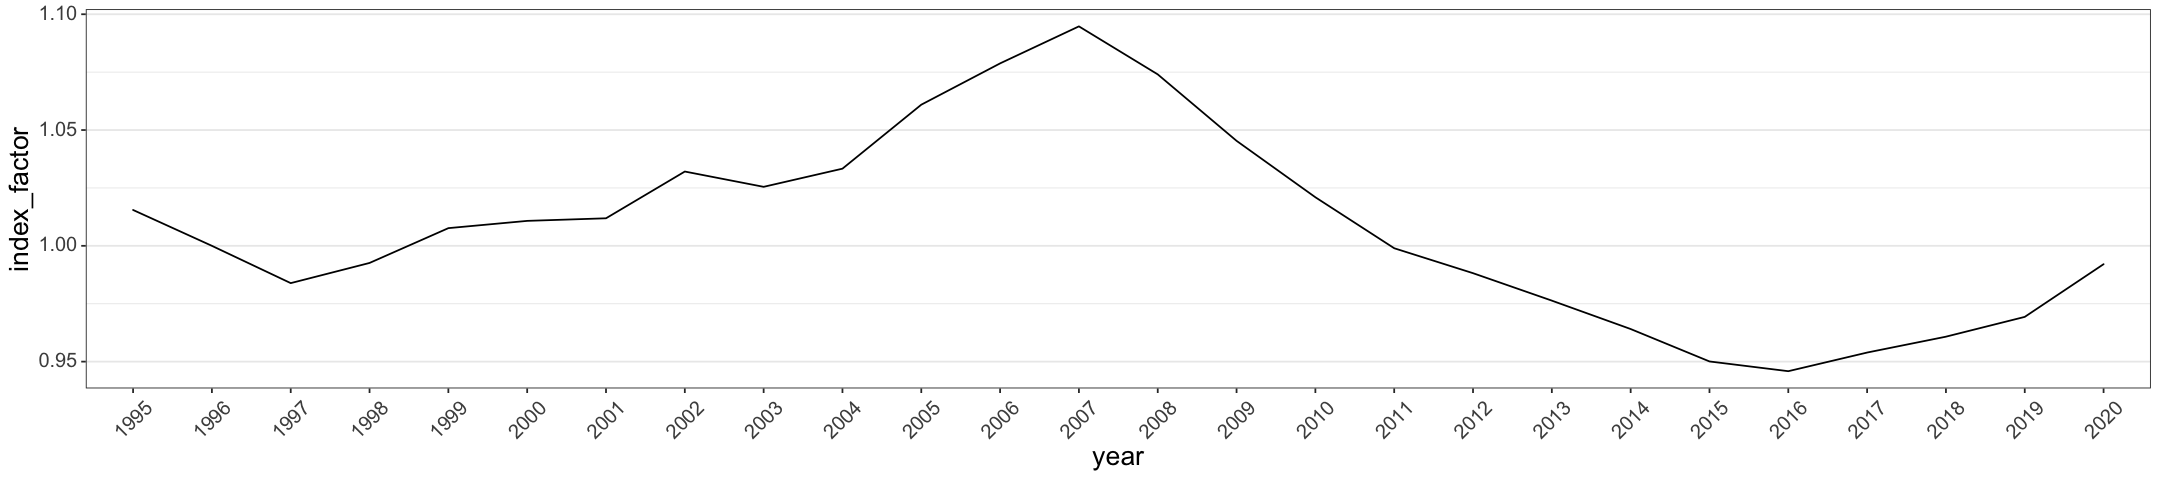

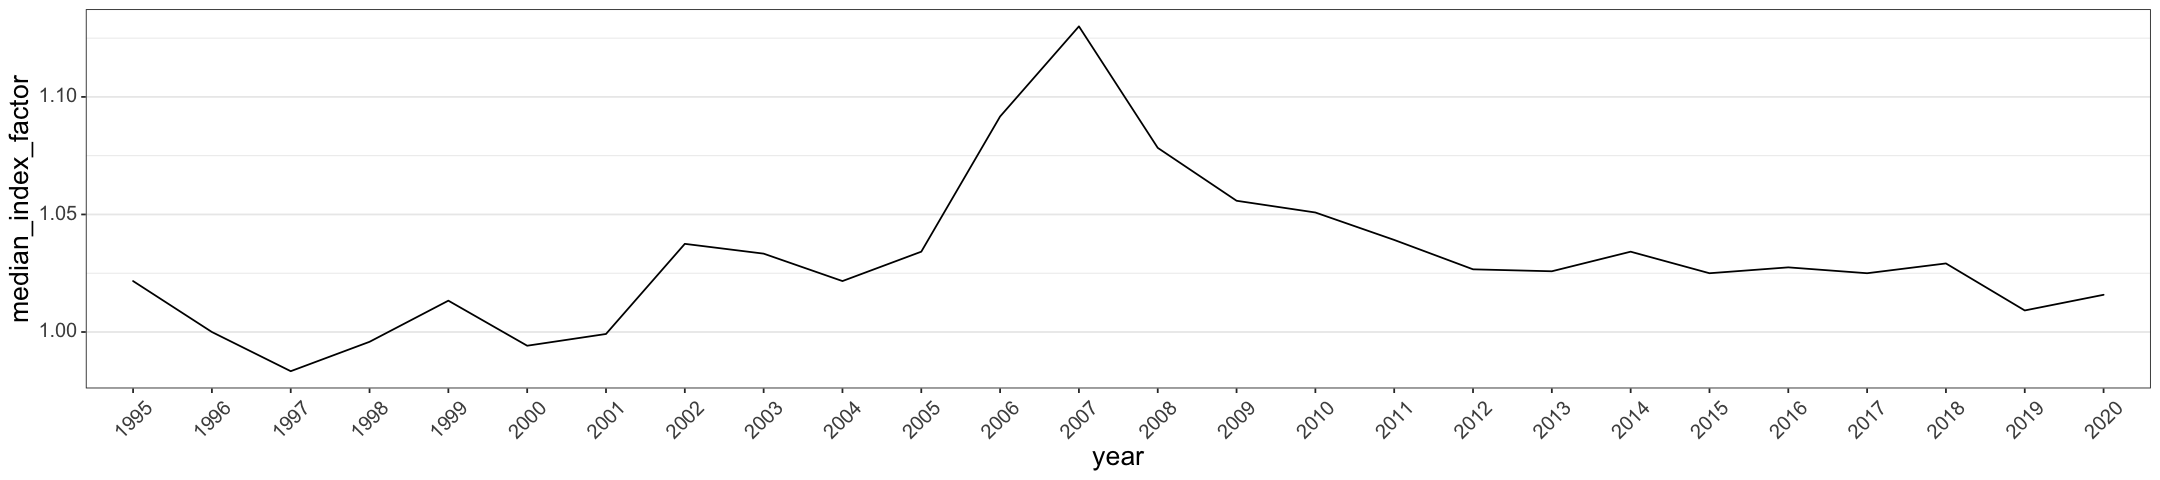

In [141]:
summary_lines <- index_factors_by_local_authority_teachers %>%
    summarise(
        median = median(teacher_count),
        mean = mean(teacher_count),
        min = min(teacher_count),
        max = max(teacher_count),
        median_base_year_census = median(base_year_census),
        mean_base_year_census = mean(base_year_census)
    )
summary_lines



options(repr.plot.width = 18, repr.plot.height = 6)

index_factors_by_local_authority_teachers %>%

    ggplot(aes(x = year, y = teacher_count, group = LocalAuthority, colour = LocalAuthority)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        geom_hline(aes(yintercept = summary_lines$median), colour = "maroon", alpha = 0.35, linetype = "dotted") +
        expand_limits(y = 0) + 
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5))

index_factors_by_local_authority_teachers %>%

    ggplot(aes(x = year, y = index_factor, group = LocalAuthority, colour = LocalAuthority)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        #geom_hline(aes(yintercept = summary_lines$median_base_year_census), colour = "maroon", alpha = 0.35, linetype = "dotted") +
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5))



options(repr.plot.width = 18, repr.plot.height = 4)
tmp_df <- index_factors_by_local_authority_teachers %>%

    group_by(year) %>%
        summarise(median_teacher_count = median(teacher_count, na.rm = TRUE),
                  median_base_year_census = median(base_year_census, na.rm = TRUE),
                  average_teacher_count = mean(teacher_count, na.rm = TRUE),
                  mean_base_year_census = mean(base_year_census, na.rm = TRUE),
                  teacher_count = sum(teacher_count, na.rm = TRUE),
                  base_year_census = sum(base_year_census, na.rm = TRUE)) %>%
        mutate(index_factor = teacher_count / base_year_census,
               median_index_factor = median_teacher_count / median_base_year_census)

index_factors_by_local_authority_teachers %>%
    
    ggplot(aes(teacher_count)) +
        geom_density(colour = "blue", size = 2) +
        geom_histogram(aes(y = stat(density)), binwidth = 10)


tmp_df %>%

    ggplot(aes(x = year, y = median_teacher_count, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        geom_hline(aes(yintercept = summary_lines$median_base_year_census), colour = "maroon", linetype = "dashed") +
        geom_hline(aes(yintercept = summary_lines$median), colour = "maroon", alpha = 0.35, linetype = "dotted") +
        geom_hline(aes(yintercept = summary_lines$mean), colour = "maroon", alpha = 0.35, linetype = "dotdash") +
        expand_limits(y = 0) + 
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5))


tmp_df %>%

    ggplot(aes(x = year, y = median_teacher_count, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        geom_hline(aes(yintercept = median_base_year_census), colour = "maroon", linetype = "dashed") +
        geom_hline(aes(yintercept = summary_lines$median), colour = "maroon", alpha = 0.35, linetype = "dotted") +
        geom_hline(aes(yintercept = summary_lines$mean), colour = "maroon", alpha = 0.35, linetype = "dotdash") +

        #scale_y_continuous(labels = scales::comma) + #stop auto-conversion to scientific mode
        #scale_x_continuous(breaks = seq(min(index_factors_by_local_authority_teachers$year), max(index_factors_by_local_authority_teachers$year), 1)) + 
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 



tmp_df %>%

    ggplot(aes(x = year, y = index_factor, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') +
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 

tmp_df %>%

    ggplot(aes(x = year, y = median_index_factor, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') +
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 


#head(tmp_df)
write_csv(tmp_df, "base/index_factors_by_local_authority_teachers-summaries_1995_2020.csv")
rm(tmp_df)

#### Techers ... Main Subject

In [290]:
historical_census_teachers_main_subject_2008_2020 <- read_csv("sta_it_402/data/demographic_data/teachers_main_subject_2008-2020.csv", trim_ws = T) %>% #, skip_empty_rows = T) # NOT skipping empty rows... :(
                                                            filter(rowSums(is.na(.)) != ncol(.))

glimpse(historical_census_teachers_main_subject_2008_2020)
head(historical_census_teachers_main_subject_2008_2020)



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  Subject = col_character(),
  `2008` = col_number(),
  `2009` = col_number(),
  `2010` = col_number(),
  `2011` = col_number(),
  `2012` = col_number(),
  `2013` = col_number(),
  `2014` = col_number(),
  `2015` = col_number(),
  `2016` = col_number(),
  `2017` = col_number(),
  `2018` = col_number(),
  `2019` = col_number(),
  `2020` = col_number()
)




Rows: 38
Columns: 14
$ Subject <chr> "English", "French", "German", "Spanish", "Gaelic", "Italian"…
$ `2008`  <dbl> 2992, 1070, 180, 64, 57, 12, 39, 8, 290, 27, 2787, 1177, 989,…
$ `2009`  <dbl> 2915, 1004, 175, 66, 57, 9, 42, 7, 297, 24, 2718, 1177, 963, …
$ `2010`  <dbl> 2794, 952, 166, 78, 59, 10, 39, 7, 280, 21, 2644, 1162, 936, …
$ `2011`  <dbl> 2678, 900, 153, 71, 60, 11, 32, 8, 286, 13, 2533, 1157, 928, …
$ `2012`  <dbl> 2636, 860, 152, 71, 61, 10, 10, 7, 299, 12, 2504, 1169, 935, …
$ `2013`  <dbl> 2590, 826, 136, 93, 60, 8, 9, 6, 276, 11, 2441, 1190, 935, 11…
$ `2014`  <dbl> 2537, 780, 128, 96, 61, 8, 7, 6, 300, 9, 2403, 1179, 937, 129…
$ `2015`  <dbl> 2509, 744, 118, 96, 59, 9, 5, 5, 313, 10, 2350, 1165, 932, 12…
$ `2016`  <dbl> 2466, 716, 106, 95, 60, 7, 4, 4, 339, 8, 2331, 1183, 942, 131…
$ `2017`  <dbl> 2483, 722, 100, 107, 57, 6, 5, 5, 354, 7, 2361, 1153, 982, 13…
$ `2018`  <dbl> 2473, 688, 90, 119, 58, 9, 6, 5, 378, 7, 2364, 1213, 948, 144…
$ `2019`  <dbl> 2491, 648, 80, 

Subject 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
1 English 2992 2915 2794 2678 2636 2590 2537 2509 2466 2483 2473 2491 2575
2 French  1070 1004  952  900  860  826  780  744  716  722  688  648  655
3 German   180  175  166  153  152  136  128  118  106  100   90   80   88
4 Spanish   64   66   78   71   71   93   96   96   95  107  119  127  132
5 Gaelic    57   57   59   60   61   60   61   59   60   57   58   58   61
6 Italian   12    9   10   11   10    8    8    9    7    6    9   11   10

In [291]:
historical_census_teachers_main_subject_2008_2020 <- historical_census_teachers_main_subject_2008_2020 %>%

    mutate_at(vars(Subject), as.factor) %>%
    
    mutate_at(vars(matches(regex("\\b\\d{4}\\b"))), as.character) %>%
    mutate_at(vars(matches(regex("\\b\\d{4}\\b"))), parse_number) %>%
    mutate_at(vars(matches(regex("\\b\\d{4}\\b"))), as.integer) %>%

    pivot_longer(matches(regex("\\b\\d{4}\\b")), names_to = "year", values_to = "teacher_count") %>% 
    mutate_at(c("year"), as.ordered)

glimpse(historical_census_teachers_main_subject_2008_2020)
head(historical_census_teachers_main_subject_2008_2020)

Rows: 494
Columns: 3
$ Subject       <fct> English, English, English, English, English, English, E…
$ year          <ord> 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2…
$ teacher_count <int> 2992, 2915, 2794, 2678, 2636, 2590, 2537, 2509, 2466, 2…


Subject year teacher_count
1 English 2008 2992         
2 English 2009 2915         
3 English 2010 2794         
4 English 2011 2678         
5 English 2012 2636         
6 English 2013 2590

In [298]:
index_factors_by_main_subject_teachers_2008_2020 <- historical_census_teachers_main_subject_2008_2020 %>%

    left_join(historical_census_teachers_main_subject_2008_2020 %>%
              
                  filter(year == 2018) %>% # base_year) %>%
                  mutate(base_year_census = teacher_count) %>%
                  select(Subject, base_year_census)
              ) %>%

    mutate(index_factor = teacher_count / base_year_census)
    
dim(index_factors_by_main_subject_teachers_2008_2020)
index_factors_by_main_subject_teachers_2008_2020[c(18:26, 308:324), ]



Joining, by = "Subject"



[1] 494   5

Subject             year teacher_count base_year_census index_factor
1  French              2012  860           688             1.2500000   
2  French              2013  826           688             1.2005814   
3  French              2014  780           688             1.1337209   
4  French              2015  744           688             1.0813953   
5  French              2016  716           688             1.0406977   
6  French              2017  722           688             1.0494186   
7  French              2018  688           688             1.0000000   
8  French              2019  648           688             0.9418605   
9  French              2020  655           688             0.9520349   
10 Home Economics      2016  786           758             1.0369393   
11 Home Economics      2017  777           758             1.0250660   
12 Home Economics      2018  758           758             1.0000000   
13 Home Economics      2019  743           758             0.9802111   
14 Home Economics      2020  775           758             1.0224274   
15 Technical Education 2008 1345          1225             1.0979592   
16 Technical Education 2009 1331          1225             1.0865306   
17 Technical Education 2010 1316          1225             1.0742857   
18 Technical Education 2011 1305          1225             1.0653061   
19 Technical Education 2012 1311          1225             1.0702041   
20 Technical Education 2013 1297          1225             1.0587755   
21 Technical Education 2014 1277          1225             1.0424490   
22 Technical Education 2015 1237          1225             1.0097959   
23 Technical Education 2016 1237          1225             1.0097959   
24 Technical Education 2017 1245          1225             1.0163265   
25 Technical Education 2018 1225          1225             1.0000000   
26 Technical Education 2019 1212          1225             0.9893878

median mean     min max  median_base_year_census mean_base_year_census
1 435.5  590.7611 1   2992 453.5                   575.3684

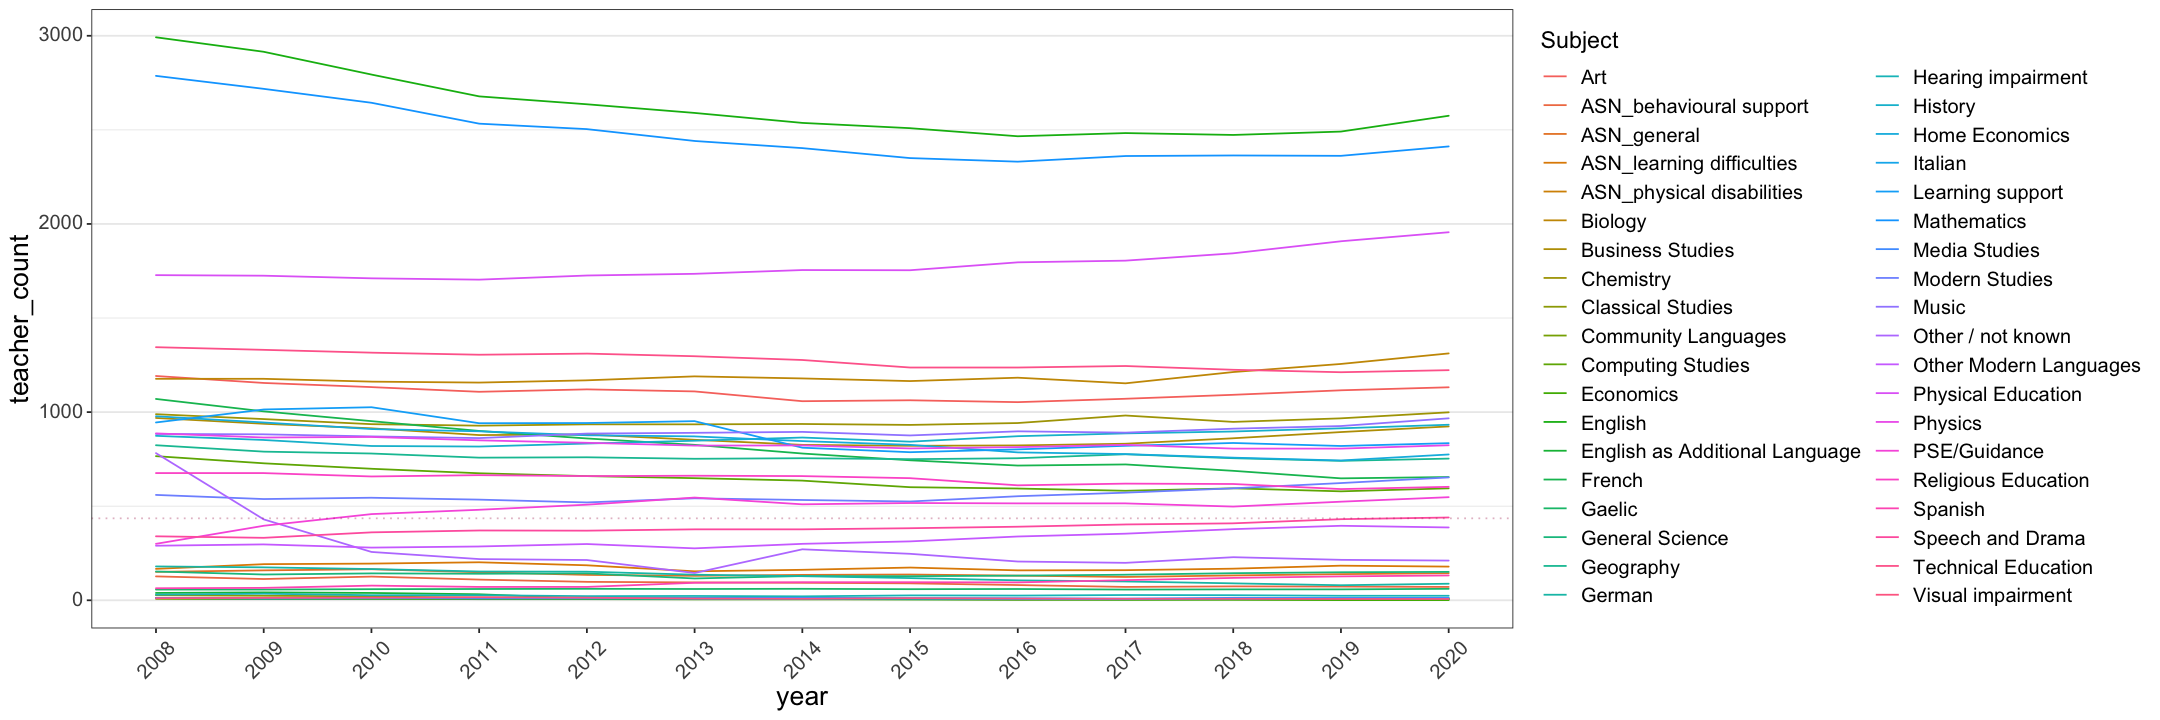

`summarise()` ungrouping output (override with `.groups` argument)



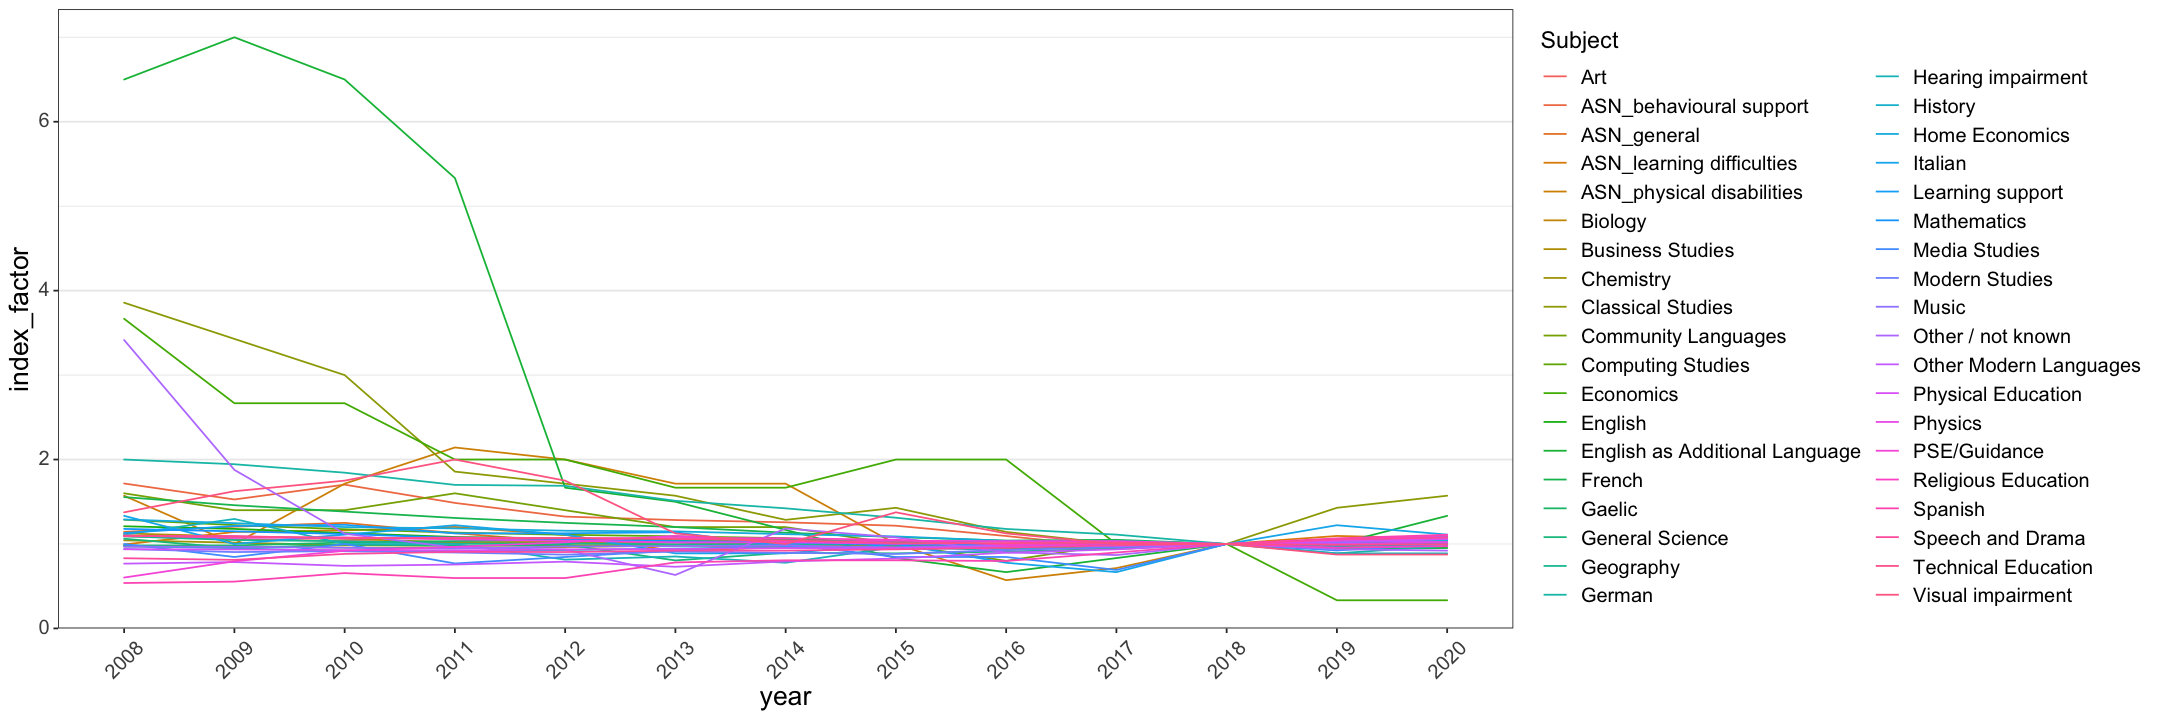

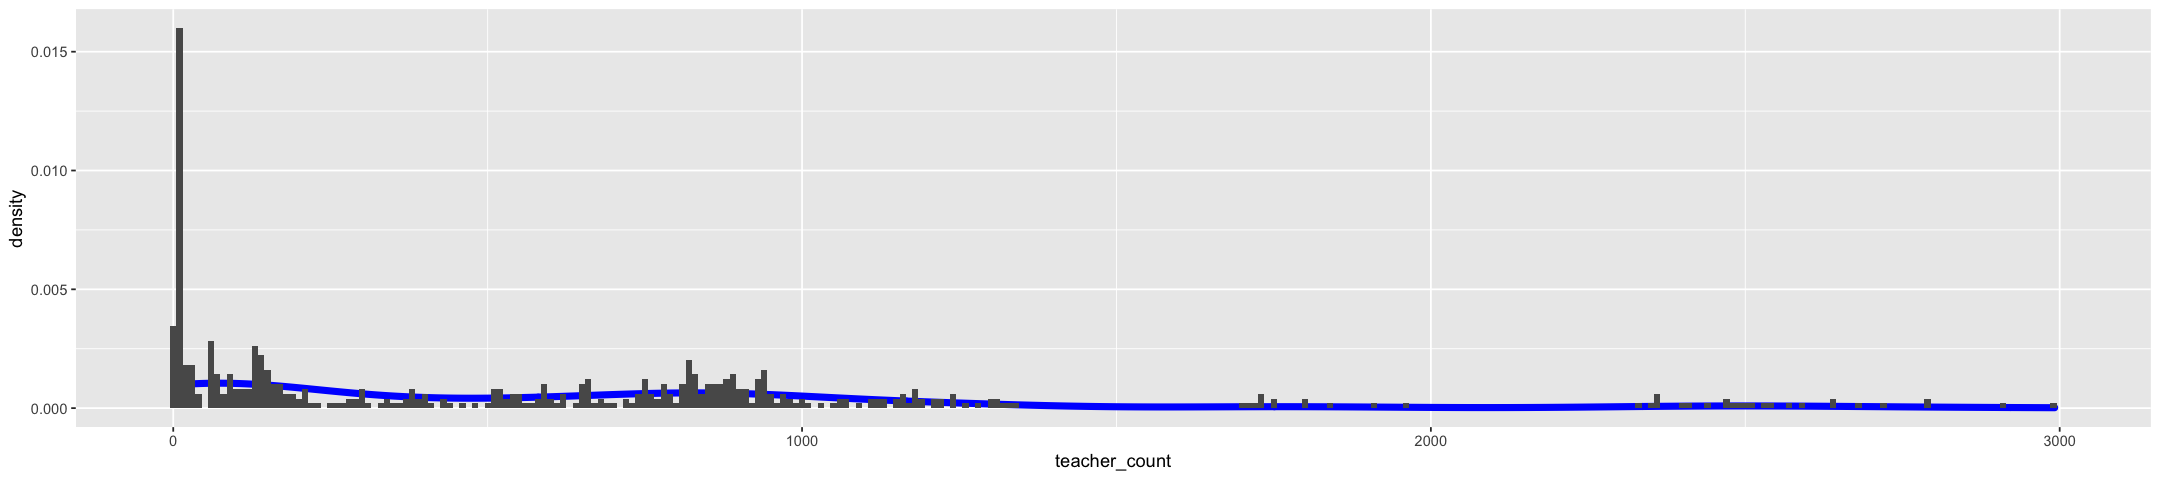

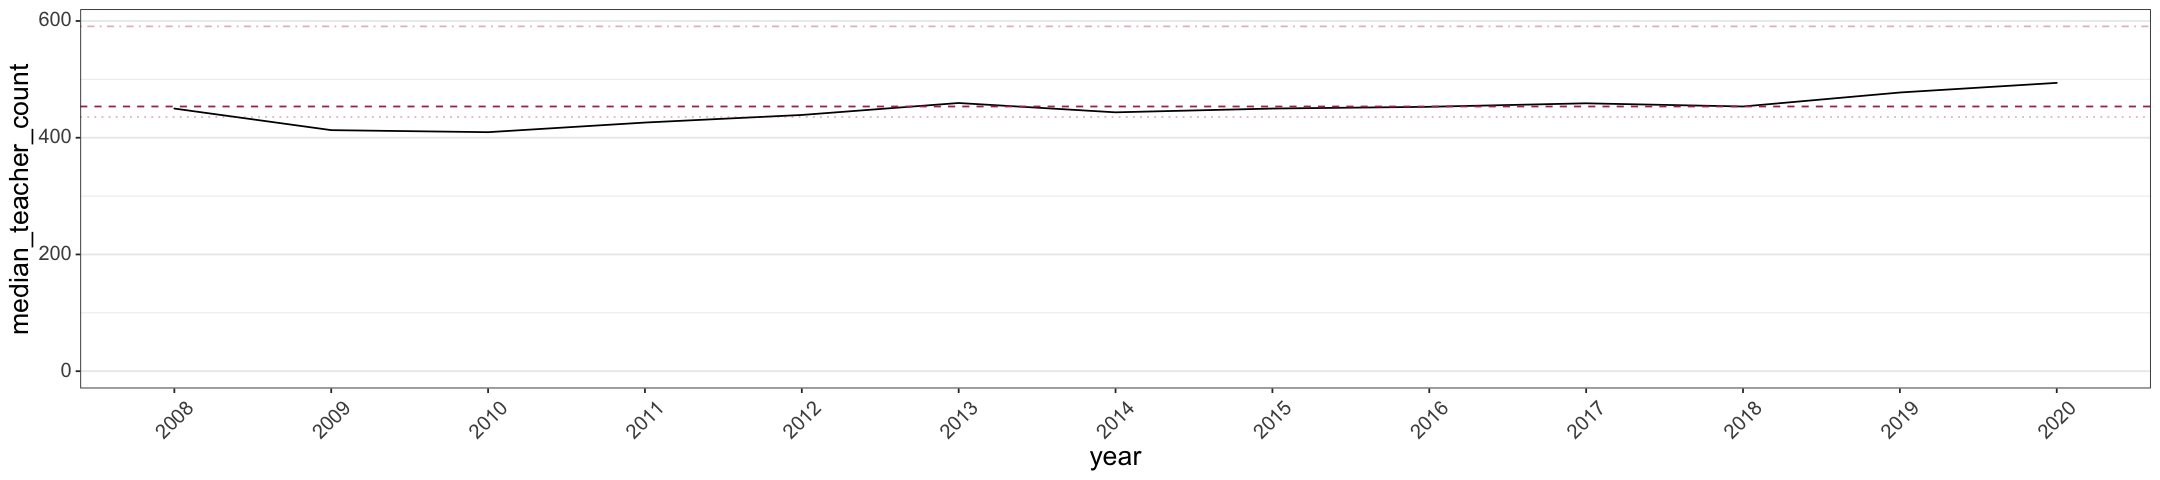

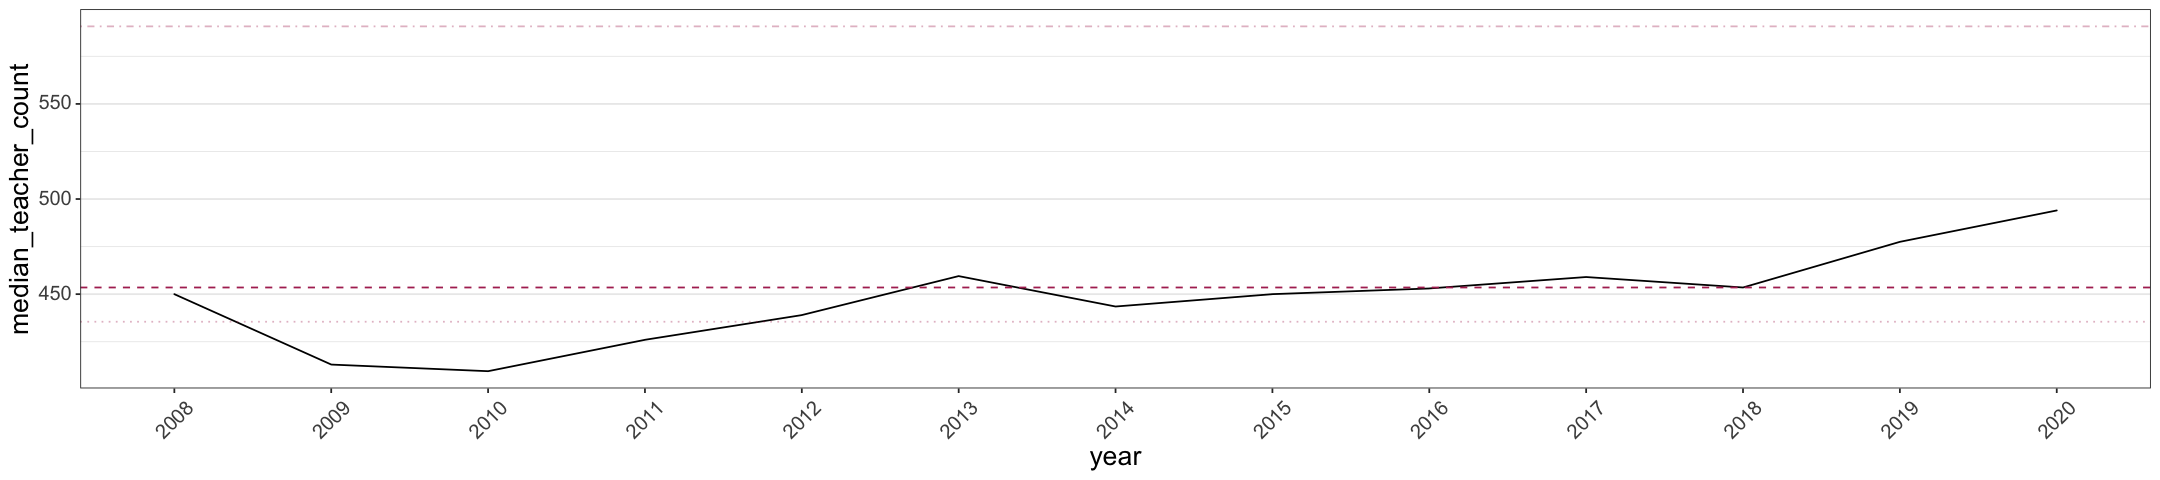

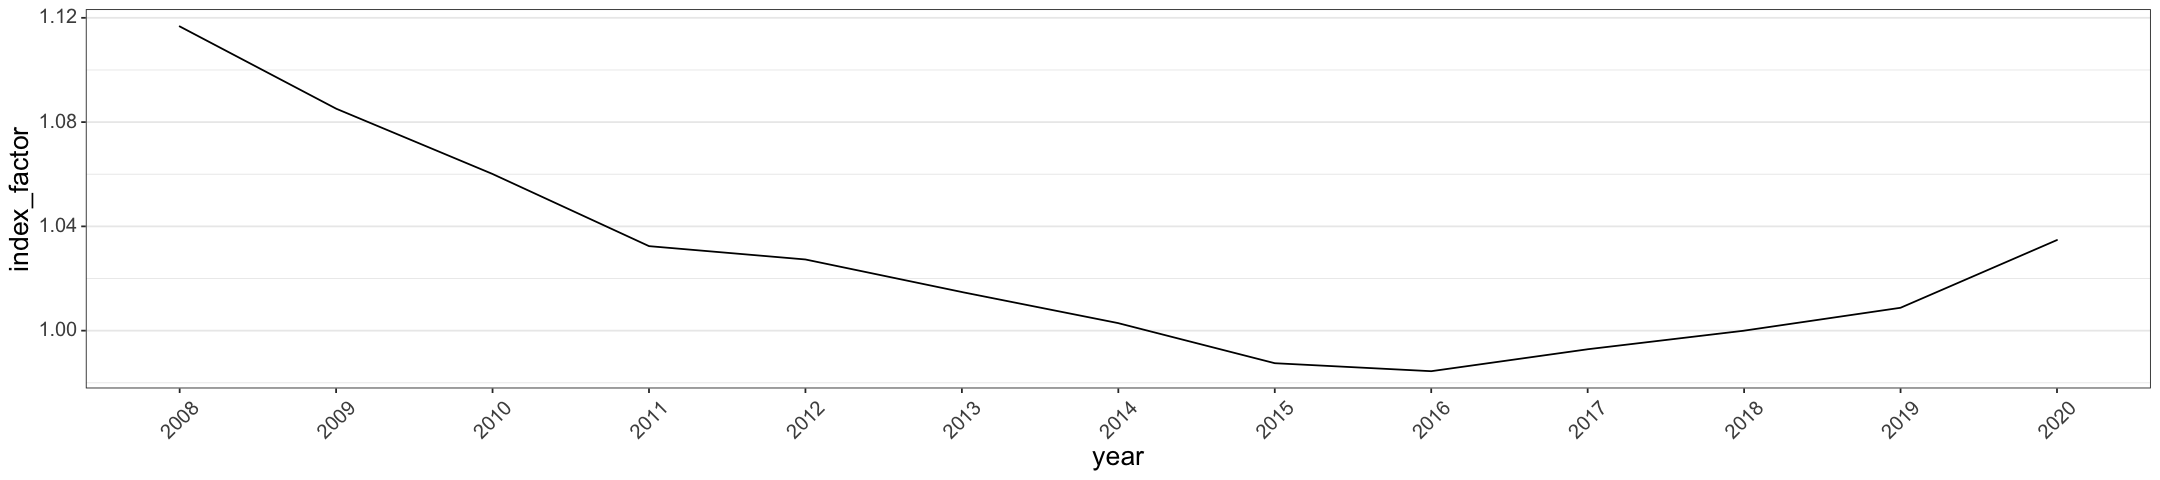

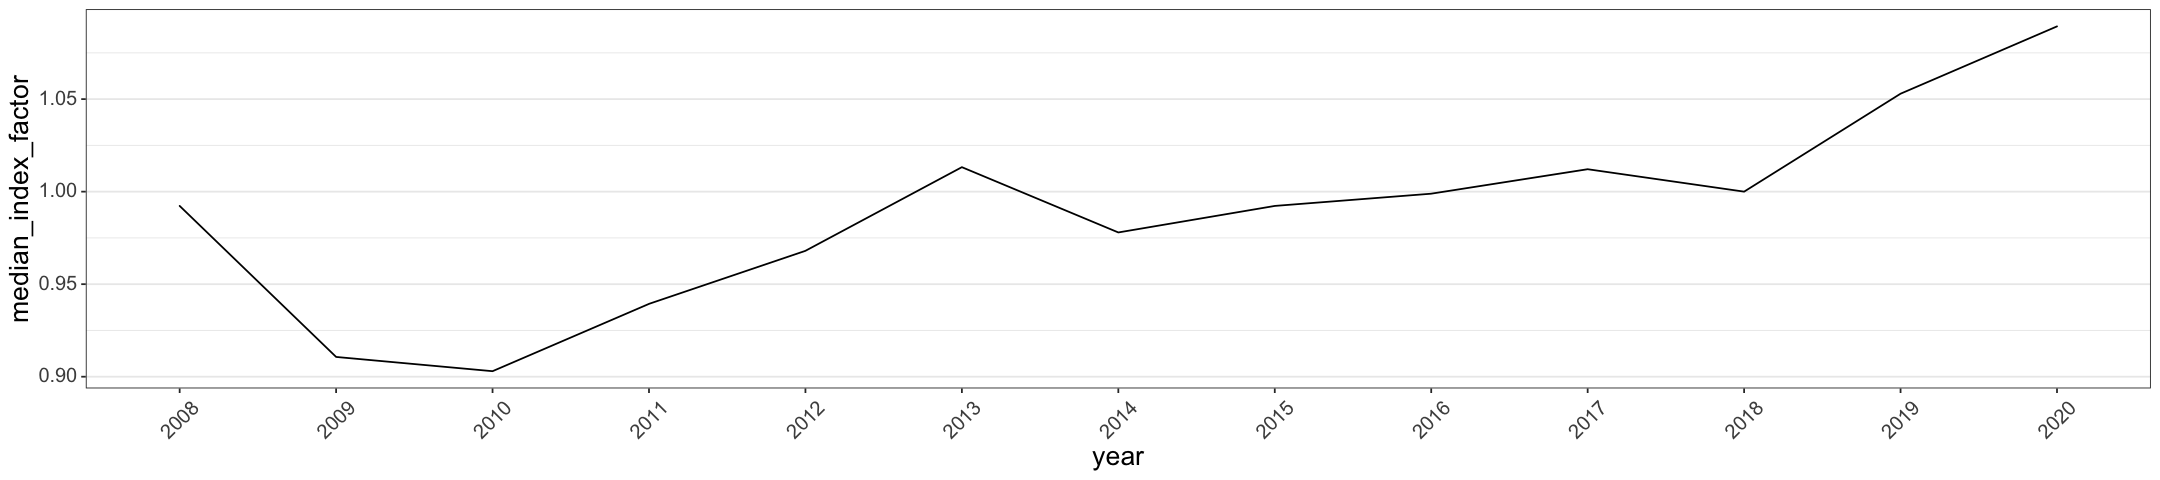

In [299]:
summary_lines <- index_factors_by_main_subject_teachers_2008_2020 %>%
    summarise(
        median = median(teacher_count),
        mean = mean(teacher_count),
        min = min(teacher_count),
        max = max(teacher_count),
        median_base_year_census = median(base_year_census),
        mean_base_year_census = mean(base_year_census)
    )
summary_lines



options(repr.plot.width = 18, repr.plot.height = 6)

index_factors_by_main_subject_teachers_2008_2020 %>%

    ggplot(aes(x = year, y = teacher_count, group = Subject, colour = Subject)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        geom_hline(aes(yintercept = summary_lines$median), colour = "maroon", alpha = 0.35, linetype = "dotted") +
        expand_limits(y = 0) + 
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5))

index_factors_by_main_subject_teachers_2008_2020 %>%

    ggplot(aes(x = year, y = index_factor, group = Subject, colour = Subject)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        #geom_hline(aes(yintercept = summary_lines$median_base_year_census), colour = "maroon", alpha = 0.35, linetype = "dotted") +
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5))



options(repr.plot.width = 18, repr.plot.height = 4)
tmp_df <- index_factors_by_main_subject_teachers_2008_2020 %>%

    group_by(year) %>%
        summarise(median_teacher_count = median(teacher_count, na.rm = TRUE),
                  median_base_year_census = median(base_year_census, na.rm = TRUE),
                  average_teacher_count = mean(teacher_count, na.rm = TRUE),
                  mean_base_year_census = mean(base_year_census, na.rm = TRUE),
                  teacher_count = sum(teacher_count, na.rm = TRUE),
                  base_year_census = sum(base_year_census, na.rm = TRUE)) %>%
        mutate(index_factor = teacher_count / base_year_census,
               median_index_factor = median_teacher_count / median_base_year_census)

index_factors_by_main_subject_teachers_2008_2020 %>%
    
    ggplot(aes(teacher_count)) +
        geom_density(colour = "blue", size = 2) +
        geom_histogram(aes(y = stat(density)), binwidth = 10)


tmp_df %>%

    ggplot(aes(x = year, y = median_teacher_count, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        geom_hline(aes(yintercept = summary_lines$median_base_year_census), colour = "maroon", linetype = "dashed") +
        geom_hline(aes(yintercept = summary_lines$median), colour = "maroon", alpha = 0.35, linetype = "dotted") +
        geom_hline(aes(yintercept = summary_lines$mean), colour = "maroon", alpha = 0.35, linetype = "dotdash") +
        expand_limits(y = 0) + 
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5))


tmp_df %>%

    ggplot(aes(x = year, y = median_teacher_count, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') + 
        geom_hline(aes(yintercept = median_base_year_census), colour = "maroon", linetype = "dashed") +
        geom_hline(aes(yintercept = summary_lines$median), colour = "maroon", alpha = 0.35, linetype = "dotted") +
        geom_hline(aes(yintercept = summary_lines$mean), colour = "maroon", alpha = 0.35, linetype = "dotdash") +

        #scale_y_continuous(labels = scales::comma) + #stop auto-conversion to scientific mode
        #scale_x_continuous(breaks = seq(min(index_factors_by_main_subject_teachers_2008_2020$year), max(index_factors_by_main_subject_teachers_2008_2020$year), 1)) + 
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 



tmp_df %>%

    ggplot(aes(x = year, y = index_factor, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') +
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 

tmp_df %>%

    ggplot(aes(x = year, y = median_index_factor, group = 1)) +  
        geom_line(lineend = 'round', linejoin = 'round') +
        
        dressCodeTheme +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 


#head(tmp_df)
write_csv(tmp_df, "base/index_factors_by_main_subject_teachers-summaries_2008_2020.csv")
rm(tmp_df)

In [301]:

#write_csv(index_factors_by_local_authority, "base/index_factors_by_local_authority_school_rolls_1996_2018.csv")
#write_csv(index_factors_rolls_1996_2018, "base/index_factors_school_rolls_1996_2018.csv")
#write_csv(index_factors_census_1966_2020, "base/index_factors_census_pupils_1966_2020.csv")
#write_csv(index_factors_by_local_authority_teachers, "base/index_factors_by_local_authority_teachers_1995_2020.csv")
#write_csv(index_factors_by_local_authority_pupils, "base/index_factors_by_local_authority_pupils_1995_2020.csv")
#write_csv(index_factors_by_main_subject_teachers_2008_2020, "base/index_factors_by_main_subject_teachers_2008_2020.csv")
